# <center>Capstone Project - The Battle of Neighborhoods (Week 2)</center>

In this lab, I'm presenting the Lab: "Capstone Project - The Battle of Neighborhoods (Week 2)" that is part of the Week 4 in the Data Science Capstone Course and the final project of the entire Professional Certificate in Data Science.

## 1.1 Introduction

We are put in practice the power of **Data Science** to solve real world problem, in this case we are going to solve business problems using all the tools learned in the **IBM Data Science program**, specially the last tools learned in the last course: **Applied Data Science Capstone**.

## 1.2 Business Problem

We are looking for Business opportunities in the city of Toronto, we are going to leverage all the data that we have of the city of New York because like financial hearts of their countries they have a lot of common, beyond its geographical proximity, and we are looking for successfull business in NY not so spread in Toronto to find an opportunity to develop a new brand or business.

-The group of interest are the investors looking for new business opportunities in the city of Toronto.

This would be an approach to solve this kind of problem in othe cities and one key element to the succesfull is choose right the cities to compare.

## 2. Data

We are going to use the data obtained from Foursquare from both cities to know the most important venues in each one and compare them to find a business that are not massive in Toronto, or even better, to find a business that are not present in the Toronto yet. The Districts to compare will be Manhattan in New York and Downtown Toronto. 

The Data are going to be colected from:

-Google maps.  
-Wikipedia, to get the names of the neighborhoods in Toronto.  
-Data from Coursera Course with the coordiantes of neighborhoods in Manhattan.  
-And one of the most important, **Foursquare API** to get the venues and information about them.

Respect to python libraries, the used will be:

-**Pandas** and **Numpy** to manipulate the data.  
-**Matplotlib** and **Seaborn** to graph statistics.  
-We are going to use specialized python libraries like **Folium** to help us to visualize the neighborhoods in geographical maps.  
-We are going to use **Geophy** to get the coordinates from each neighborhood in Toronto.  
-**Sklearn** to use K-means to cluster the neighborhoods.


## 3. Methodology

We have to get the data from Manhattan and Downtown Toronto to get the neighboorhoods and venues before proceed to compare them to find the information requested. Let's start!

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0

<a id='item1'></a>

## 1. Download and Explore Dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

Luckily, this dataset exists for free on the web. Feel free to try to find this dataset on your own, but here is the link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

For your convenience, I downloaded the files and placed it on the server, so you can simply run a `wget` command and access the data. So let's go ahead and do that.

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


#### Load and explore the data

Next, let's load the data.

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [5]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [8]:
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

Then let's loop through the data and fill the dataframe one row at a time.

In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [10]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [13]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [14]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

Let's get the geographical coordinates of Manhattan.

In [15]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


As we did with all of New York City, let's visualizat Manhattan the neighborhoods in it.

In [16]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [17]:
CLIENT_ID = '2E0HFCQ0UA0YLCFJF4JON3V40KXFQD4FAI2DYCWIRX4L04QU' # your Foursquare ID
CLIENT_SECRET = 'OPDP1W5CP4WSL35KLARVZGJYG3JNHBVED4ETX1WIUVSVBPMF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2E0HFCQ0UA0YLCFJF4JON3V40KXFQD4FAI2DYCWIRX4L04QU
CLIENT_SECRET:OPDP1W5CP4WSL35KLARVZGJYG3JNHBVED4ETX1WIUVSVBPMF


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [18]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

Get the neighborhood's latitude and longitude values.

In [19]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [20]:
# type your answer here
LIMIT = 100
radius=500

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=2E0HFCQ0UA0YLCFJF4JON3V40KXFQD4FAI2DYCWIRX4L04QU&client_secret=OPDP1W5CP4WSL35KLARVZGJYG3JNHBVED4ETX1WIUVSVBPMF&ll=40.87655077879964,-73.91065965862981&v=20180605&radius=500&limit=100'

Double-click __here__ for the solution.
<!-- The correct answer is:
LIMIT = 100 # limit of number of venues returned by Foursquare API
-->

<!--
radius = 500 # define radius
-->

<!--
\\ # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
--> 

Send the GET request and examine the resutls

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f4d55ce3732647dc674f25a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name   categories        lat        lng
0       Arturo's  Pizza Place  40.874412 -73.910271
1    Bikram Yoga  Yoga Studio  40.876844 -73.906204
2  Tibbett Diner        Diner  40.880404 -73.908937
3      Starbucks  Coffee Shop  40.877531 -73.905582
4        Dunkin'   Donut Shop  40.877136 -73.906666

And how many venues were returned by Foursquare?

In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

24 venues were returned by Foursquare.


<a id='item2'></a>

## 2. Explore Neighborhoods in Manhattan

#### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [26]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


Double-click __here__ for the solution.
<!-- The correct answer is:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )
--> 

#### Let's check the size of the resulting dataframe

In [27]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3192, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

Let's check how many venues were returned for each neighborhood

In [28]:
manhattan_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Battery Park City                       66                      66     66   
Carnegie Hill                           86                      86     86   
Central Harlem                          44                      44     44   
Chelsea                                100                     100    100   
Chinatown                              100                     100    100   
Civic Center                           100                     100    100   
Clinton                                100                     100    100   
East Harlem                             42                      42     42   
East Village                           100                     100    100   
Financial District                     100                     100    100   
Flatiron                               100                     100    100   
Gramercy                                97                      97     97   
Greenwich Village                      100                     100    100   
Hamilton Heights                        61                      61     61   
Hudson Yards                            59                      59     59   
Inwood                                  59                      59     59   
Lenox Hill                             100                     100    100   
Lincoln Square                          94                      94     94   
Little Italy                           100                     100    100   
Lower East Side                         50                      50     50   
Manhattan Valley                        46                      46     46   
Manhattanville                          44                      44     44   
Marble Hill                             24                      24     24   
Midtown                                100                     100    100   
Midtown South                          100                     100    100   
Morningside Heights                     42                      42     42   
Murray Hill                            100                     100    100   
Noho                                   100                     100    100   
Roosevelt Island                        25                      25     25   
Soho                                   100                     100    100   
Stuyvesant Town                         17                      17     17   
Sutton Place                           100                     100    100   
Tribeca                                 84                      84     84   
Tudor City                              80                      80     80   
Turtle Bay                             100                     100    100   
Upper East Side                         94                      94     94   
Upper West Side                         91                      91     91   
Washington Heights                      87                      87     87   
West Village                           100                     100    100   
Yorkville                              100                     100    100   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                          
Battery Park City                66               66              66  
Carnegie Hill                    86               86              86  
Central Harlem                   44               44              44  
Chelsea                         100              100             100  
Chinatown                       100              100             100  
Civic Center                    100              100             100  
Clinton                         100              100             100  
East Harlem                      42               42              42  
East Village                    100              100             100  
Finan

#### Let's find out how many unique categories can be curated from all the returned venues

In [29]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 324 uniques categories.


<a id='item3'></a>

## 3. Analyze Each Neighborhood

In [30]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Marble Hill                  0               0                  0   
1  Marble Hill                  0               0                  0   
2  Marble Hill                  0               0                  0   
3  Marble Hill                  0               0                  0   
4  Marble Hill                  0               0                  0   

   African Restaurant  American Restaurant  Antique Shop  Arepa Restaurant  \
0                   0                    0             0                 0   
1                   0                    0             0                 0   
2                   0                    0             0                 0   
3                   0                    0             0                 0   
4                   0                    0             0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0                 0                   0           0                      0   
1                 0                   0           0                      0   
2                 0                   0           0                      0   
3                 0                   0           0                      0   
4                 0                   0           0                      0   

   Austrian Restaurant  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0                    0          0           0           0       0     0    0   
1                    0          0           0           0       0     0    0   
2                    0          0           0           0       0     0    0   
3                    0          0           0           0       0     0    0   
4                    0          0           0           0       0     0    0   

   Baseball Field  Basketball Court  Beer Bar  Beer Garden  Beer Store  \
0               0                 0         0            0           0   
1               0                 0         0            0           0   
2               0                 0         0            0           0   
3               0                 0         0            0           0   
4               0                 0         0            0           0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  \
0              0                         0          0           0       0   
1              0                         0          0           0       0   
2              0                         0          0           0       0   
3              0                         0          0           0       0   
4              0                         0          0           0       0   

   Board Shop  Boat or Ferry  Bookstore  Boutique  Boxing Gym  \
0           0              0          0         0           0   
1           0              0          0         0           0   
2           0              0          0         0           0   
3           0              0          0         0           0   
4           0              0          0         0           0   

   Brazilian Restaurant  Breakfast Spot  Bridal Shop  Bridge  Bubble Tea Shop  \
0                     0               0            0       0                0   
1                     0               0            0       0                0   
2                     0               0            0       0                0   
3                     0               0            0       0                

And let's examine the new dataframe size.

In [31]:
manhattan_onehot.shape

(3192, 325)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [32]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0     Battery Park City           0.000000            0.00               0.00   
1         Carnegie Hill           0.000000            0.00               0.00   
2        Central Harlem           0.000000            0.00               0.00   
3               Chelsea           0.000000            0.00               0.00   
4             Chinatown           0.000000            0.00               0.00   
5          Civic Center           0.000000            0.00               0.00   
6               Clinton           0.000000            0.00               0.00   
7           East Harlem           0.000000            0.00               0.00   
8          East Village           0.000000            0.00               0.00   
9    Financial District           0.000000            0.00               0.00   
10             Flatiron           0.010000            0.00               0.00   
11             Gramercy           0.000000            0.00               0.00   
12    Greenwich Village           0.000000            0.00               0.00   
13     Hamilton Heights           0.000000            0.00               0.00   
14         Hudson Yards           0.000000            0.00               0.00   
15               Inwood           0.000000            0.00               0.00   
16           Lenox Hill           0.000000            0.00               0.01   
17       Lincoln Square           0.000000            0.00               0.00   
18         Little Italy           0.000000            0.00               0.00   
19      Lower East Side           0.000000            0.00               0.00   
20     Manhattan Valley           0.000000            0.00               0.00   
21       Manhattanville           0.000000            0.00               0.00   
22          Marble Hill           0.000000            0.00               0.00   
23              Midtown           0.000000            0.00               0.00   
24        Midtown South           0.000000            0.00               0.00   
25  Morningside Heights           0.000000            0.00               0.00   
26          Murray Hill           0.000000            0.00               0.00   
27                 Noho           0.000000            0.00               0.00   
28     Roosevelt Island           0.000000            0.00               0.00   
29                 Soho           0.000000            0.00               0.00   
30      Stuyvesant Town           0.000000            0.00               0.00   
31         Sutton Place           0.000000            0.01               0.00   
32              Tribeca           0.000000            0.00               0.00   
33           Tudor City           0.000000            0.00               0.00   
34           Turtle Bay           0.000000            0.00               0.00   
35      Upper East Side           0.000000            0.00               0.00   
36      Upper West Side           0.010989            0.00               0.00   
37   Washington Heights           0.011494            0.00               0.00   
38         West Village           0.010000            0.01               0.00   
39            Yorkville           0.000000            0.00               0.00   

    African Restaurant  American Restaurant  Antique Shop  Arepa Restaurant  \
0             0.000000             0.000000          0.00          0.000000   
1             0.000000             0.000000          0.00          0.000000   
2             0.068182             0.045455          0.00          0.000000   
3             0.000000             0.040000          0.00          0.010000   
4             0.000000             0.030000          0.00          0.000000   
5             0.000000             0.030000          0.01          0.000000   
6             0.000000             0.050000          0.00          0.000000   
7             0.000000             0.000000          0.00

#### Let's confirm the new size

In [33]:
manhattan_grouped.shape

(40, 325)

#### Let's print each neighborhood along with the top 5 most common venues

In [34]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.09
1          Hotel  0.08
2    Coffee Shop  0.06
3            Gym  0.06
4  Memorial Site  0.05


----Carnegie Hill----
                  venue  freq
0           Coffee Shop  0.07
1                  Café  0.05
2           Yoga Studio  0.03
3  Gym / Fitness Center  0.03
4     French Restaurant  0.03


----Central Harlem----
                venue  freq
0  African Restaurant  0.07
1  Seafood Restaurant  0.05
2                 Bar  0.05
3   French Restaurant  0.05
4      Cosmetics Shop  0.05


----Chelsea----
                 venue  freq
0          Coffee Shop  0.07
1  American Restaurant  0.04
2          Art Gallery  0.04
3    French Restaurant  0.03
4   Italian Restaurant  0.03


----Chinatown----
                venue  freq
0  Chinese Restaurant  0.09
1        Cocktail Bar  0.05
2              Bakery  0.04
3        Dessert Shop  0.04
4        Optical Shop  0.03


----Civic Center----
                  venue  freq
0     

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Battery Park City                  Park                 Hotel   
1      Carnegie Hill           Coffee Shop                  Café   
2     Central Harlem    African Restaurant     French Restaurant   
3            Chelsea           Coffee Shop   American Restaurant   
4          Chinatown    Chinese Restaurant          Cocktail Bar   

  3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
0                   Gym           Coffee Shop          Memorial Site   
1             Bookstore     French Restaurant         Cosmetics Shop   
2   American Restaurant        Cosmetics Shop                    Bar   
3           Art Gallery                Bakery         Ice Cream Shop   
4          Dessert Shop                Bakery  Vietnamese Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Shopping Mall            Food Court        Sandwich Place   
1    Italian Restaurant           Yoga Studio  Gym / Fitness Center   
2    Seafood Restaurant    Chinese Restaurant            Public Art   
3     French Restaurant    Italian Restaurant      Sushi Restaurant   
4          Noodle House          Optical Shop                   Spa   

  9th Most Common Venue 10th Most Common Venue  
0             BBQ Joint           Gourmet Shop  
1             Wine Shop                    Gym  
2               Library       Tapas Restaurant  
3          Cocktail Bar                 Market  
4     Hotpot Restaurant    American Restaurant

<a id='item4'></a>

## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [37]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 2, 1, 2, 2, 0, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Manhattan         Marble Hill  40.876551 -73.910660               4   
1  Manhattan           Chinatown  40.715618 -73.994279               1   
2  Manhattan  Washington Heights  40.851903 -73.936900               0   
3  Manhattan              Inwood  40.867684 -73.921210               0   
4  Manhattan    Hamilton Heights  40.823604 -73.949688               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0           Coffee Shop        Discount Store        Sandwich Place   
1    Chinese Restaurant          Cocktail Bar          Dessert Shop   
2                  Café                Bakery     Mobile Phone Shop   
3                Lounge    Mexican Restaurant            Restaurant   
4           Pizza Place           Coffee Shop                  Café   

  4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
0                   Gym            Yoga Studio            Kids Store   
1                Bakery  Vietnamese Restaurant          Noodle House   
2                  Bank     Spanish Restaurant        Sandwich Place   
3                  Café     Spanish Restaurant    Frozen Yogurt Shop   
4         Deli / Bodega     Mexican Restaurant                Bakery   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0        Ice Cream Shop              Pharmacy         Deli / Bodega   
1          Optical Shop                   Spa     Hotpot Restaurant   
2                  Park            Donut Shop      Tapas Restaurant   
3                Bakery  Caribbean Restaurant    Chinese Restaurant   
4                  Park          Cocktail Bar        Sandwich Place   

  10th Most Common Venue  
0       Department Store  
1    American Restaurant  
2        Supplement Shop  
3                   Park  
4                 School

Finally, let's visualize the resulting clusters

In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [40]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
2   Washington Heights                  Café                Bakery   
3               Inwood                Lounge    Mexican Restaurant   
4     Hamilton Heights           Pizza Place           Coffee Shop   
7          East Harlem    Mexican Restaurant                Bakery   
20     Lower East Side    Chinese Restaurant           Coffee Shop   
36          Tudor City                  Park                  Café   

   3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  \
2      Mobile Phone Shop                       Bank    Spanish Restaurant   
3             Restaurant                       Café    Spanish Restaurant   
4                   Café              Deli / Bodega    Mexican Restaurant   
7        Thai Restaurant  Latin American Restaurant        Sandwich Place   
20                Bakery                Pizza Place                  Park   
36    Mexican Restaurant              Deli / Bodega                 Diner   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
2         Sandwich Place                  Park            Donut Shop   
3     Frozen Yogurt Shop                Bakery  Caribbean Restaurant   
4                 Bakery                  Park          Cocktail Bar   
7          Deli / Bodega                   Spa              Pharmacy   
20                  Café      Ramen Restaurant           Art Gallery   
36           Coffee Shop                   Gym      Asian Restaurant   

   9th Most Common Venue 10th Most Common Venue  
2       Tapas Restaurant        Supplement Shop  
3     Chinese Restaurant                   Park  
4         Sandwich Place                 School  
7             Steakhouse             Street Art  
20   Japanese Restaurant           Cocktail Bar  
36                Garden        Thai Restaurant

#### Cluster 2

In [41]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1            Chinatown    Chinese Restaurant          Cocktail Bar   
6       Central Harlem    African Restaurant     French Restaurant   
8      Upper East Side    Italian Restaurant           Coffee Shop   
9            Yorkville    Italian Restaurant                   Gym   
10          Lenox Hill           Coffee Shop           Pizza Place   
12     Upper West Side    Italian Restaurant                   Bar   
16         Murray Hill                 Hotel   Japanese Restaurant   
18   Greenwich Village    Italian Restaurant      Sushi Restaurant   
19        East Village                   Bar        Ice Cream Shop   
22        Little Italy                Bakery       Bubble Tea Shop   
23                Soho    Italian Restaurant        Clothing Store   
25    Manhattan Valley           Coffee Shop                   Bar   
27            Gramercy                   Bar    Italian Restaurant   
29  Financial District           Coffee Shop           Pizza Place   
30       Carnegie Hill           Coffee Shop                  Café   
31                Noho    Italian Restaurant                 Hotel   
34        Sutton Place    Italian Restaurant           Coffee Shop   
38            Flatiron   Japanese Restaurant    Italian Restaurant   

       3rd Most Common Venue    4th Most Common Venue  \
1               Dessert Shop                   Bakery   
6        American Restaurant           Cosmetics Shop   
8                     Bakery                  Exhibit   
9                Coffee Shop                      Bar   
10          Sushi Restaurant       Italian Restaurant   
12               Coffee Shop        Indian Restaurant   
16            Sandwich Place     Gym / Fitness Center   
18                      Café           Clothing Store   
19               Pizza Place       Mexican Restaurant   
22                      Café              Coffee Shop   
23               Coffee Shop                   Bakery   
25               Yoga Studio       Mexican Restaurant   
27               Coffee Shop               Bagel Shop   
29              Cocktail Bar           Sandwich Place   
30                 Bookstore        French Restaurant   
31               Pizza Place           Sandwich Place   
34    Furniture / Home Store     Gym / Fitness Center   
38  Mediterranean Restaurant  New American Restaurant   

       5th Most Common Venue 6th Most Common Venue  \
1      Vietnamese Restaurant          Noodle House   
6                        Bar    Seafood Restaurant   
8       Gym / Fitness Center           Yoga Studio   
9           Sushi Restaurant         Deli / Bodega   
10              Cocktail Bar         Deli / Bodega   
12                  Wine Bar                  Café   
16               Coffee Shop                   Bar   
18         Indian Restaurant    Chinese Restaurant   
19              Cocktail Bar              Wine Bar   
22        Italian Restaurant    Salon / Barbershop   
23  Mediterranean Restaurant              Boutique   
25           Thai Restaurant            Playground   
27               Pizza Place   American Restaurant   
29                Steakhouse                   Bar   
30            Cosmetics Shop    Italian Restaurant   
31             Grocery Store    Mexican Restaurant   
34                      Park           Yoga Studio   
38       American Restaurant    Salon / Barbershop   

            7th Most Common Venue     8th Most Common Venue  \
1                    Optical Shop                       Spa   
6              Chinese Restaurant                Public Art   
8                  Cosmetics Shop         French Restaurant   
9                       Wine Shop        Mexican Restaurant   
10                            Gym                      Café   
12  Vegetarian / Vegan Restaurant  Mediterranean Restaurant   
16            American Restaurant        Italian Restaurant   
18           Caribbean Restaurant               Coffee Shop   
1

#### Cluster 3

In [42]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue    2nd Most Common Venue  \
5        Manhattanville    Seafood Restaurant              Coffee Shop   
11     Roosevelt Island                  Park               Playground   
13       Lincoln Square                 Plaza       Italian Restaurant   
14              Clinton               Theater      American Restaurant   
15              Midtown                 Hotel           Clothing Store   
17              Chelsea           Coffee Shop      American Restaurant   
21              Tribeca   American Restaurant                     Park   
24         West Village    Italian Restaurant  New American Restaurant   
26  Morningside Heights                  Park              Coffee Shop   
28    Battery Park City                  Park                    Hotel   
32         Civic Center           Coffee Shop                    Hotel   
33        Midtown South     Korean Restaurant                    Hotel   
35           Turtle Bay    Italian Restaurant              Coffee Shop   
39         Hudson Yards                 Hotel      American Restaurant   

   3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
5       Sushi Restaurant     Italian Restaurant    Mexican Restaurant   
11     Food & Drink Shop         Farmers Market          Soccer Field   
13                  Café  Performing Arts Venue               Theater   
14  Gym / Fitness Center            Coffee Shop    Italian Restaurant   
15                Bakery            Coffee Shop        Sandwich Place   
17           Art Gallery                 Bakery        Ice Cream Shop   
21    Italian Restaurant                    Spa              Wine Bar   
24   American Restaurant           Cocktail Bar                  Park   
26             Bookstore    American Restaurant         Deli / Bodega   
28                   Gym            Coffee Shop         Memorial Site   
32  Gym / Fitness Center           Cocktail Bar                   Spa   
33   Japanese Restaurant           Dessert Shop                Bakery   
35      Sushi Restaurant                   Park    Seafood Restaurant   
39       Thai Restaurant   Gym / Fitness Center    Italian Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
5                   Park                  Café              Boutique   
11           Supermarket           Dry Cleaner                School   
13          Concert Hall  Gym / Fitness Center                Bakery   
14                   Gym        Sandwich Place                   Spa   
15   Sporting Goods Shop               Theater            Steakhouse   
17     French Restaurant    Italian Restaurant      Sushi Restaurant   
21           Coffee Shop                  Café      Greek Restaurant   
24               Theater             Jazz Club     French Restaurant   
26            Food Truck          Burger Joint                  Café   
28         Shopping Mall            Food Court        Sandwich Place   
32           Yoga Studio                Bakery    Italian Restaurant   
33        Cosmetics Shop   American Restaurant          Burger Joint   
35   Japanese Restaurant     French Restaurant      Ramen Restaurant   
39               Dog Run           Coffee Shop                  Café   

   9th Most Common Venue 10th Most Common Venue  
5                  Diner            Supermarket  
11        Scenic Lookout           Liquor Store  
13   American Restaurant      French Restaurant  
14                 Hotel              Wine Shop  
15                  Café              Bookstore  
17          Cocktail Bar                 Market  
21            Playground            Men's Store  
24           Coffee Shop               Wine Bar  
26        Ice Cream Shop     Frozen Yogurt Shop  
28             BBQ Joint           Gourmet Shop  
32     French Restaurant    American Restaurant  
33  Gym / Fitness Center            Flower Shop  
35         Deli / Bodega               Wine Bar  
39                  Par

#### Cluster 4

In [43]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
37  Stuyvesant Town                  Park        Baseball Field   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
37              Heliport           Gas Station        Farmers Market   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
37         Boat or Ferry                Bistro  Gym / Fitness Center   

   9th Most Common Venue 10th Most Common Venue  
37                   Bar           Cocktail Bar

#### Cluster 5

In [44]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Marble Hill           Coffee Shop        Discount Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Sandwich Place                   Gym           Yoga Studio   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Kids Store        Ice Cream Shop              Pharmacy   

  9th Most Common Venue 10th Most Common Venue  
0         Deli / Bodega       Department Store

Now, lets do it for Downtown Toronto.

In [45]:
#!pip install beautifulsoup4
!pip install lxml
#!pip install html5lib

#import html5lib
#import requests
#from bs4 import BeautifulSoup

     |████████████████████████████████| 5.5MB 6.0MB/s eta 0:00:01     |███████████████████████████▏    | 4.7MB 6.0MB/s eta 0:00:01


In [1]:
!pip install beautifulsoup4
!pip install lxml
!pip install html5lib

import pandas as pd
import numpy as np
import html5lib
import requests
from bs4 import BeautifulSoup


     |████████████████████████████████| 122kB 5.8MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 5.3MB/s eta 0:00:01


In [46]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_raw = pd.read_html(url)
df_raw[0]

Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
7           M8A      Not assigned   
8           M9A         Etobicoke   
9           M1B       Scarborough   
10          M2B      Not assigned   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
15          M7B      Not assigned   
16          M8B      Not assigned   
17          M9B         Etobicoke   
18          M1C       Scarborough   
19          M2C      Not assigned   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
24          M7C      Not assigned   
25          M8C      Not assigned   
26          M9C         Etobicoke   
27          M1E       Scarborough   
28          M2E      Not assigned   
29          M3E      Not assigned   
30          M4E      East Toronto   
31          M5E  Downtown Toronto   
32          M6E              York   
33          M7E      Not assigned   
34          M8E      Not assigned   
35          M9E      Not assigned   
36          M1G       Scarborough   
37          M2G      Not assigned   
38          M3G      Not assigned   
39          M4G         East York   
40          M5G  Downtown Toronto   
41          M6G  Downtown Toronto   
42          M7G      Not assigned   
43          M8G      Not assigned   
44          M9G      Not assigned   
45          M1H       Scarborough   
46          M2H        North York   
47          M3H        North York   
48          M4H         East York   
49          M5H  Downtown Toronto   
50          M6H      West Toronto   
51          M7H      Not assigned   
52          M8H      Not assigned   
53          M9H      Not assigned   
54          M1J       Scarborough   
55          M2J        North York   
56          M3J        North York   
57          M4J         East York   
58          M5J  Downtown Toronto   
59          M6J      West Toronto   
60          M7J      Not assigned   
61          M8J      Not assigned   
62          M9J      Not assigned   
63          M1K       Scarborough   
64          M2K        North York   
65          M3K        North York   
66          M4K      East Toronto   
67          M5K  Downtown Toronto   
68          M6K      West Toronto   
69          M7K      Not assigned   
70          M8K      Not assigned   
71          M9K      Not assigned   
72          M1L       Scarborough   
73          M2L        North York   
74          M3L        North York   
75          M4L      East Toronto   
76          M5L  Downtown Toronto   
77          M6L        North York   
78          M7L      Not assigned   
79          M8L      Not assigned   
80          M9L        North York   
81          M1M       Scarborough   
82          M2M        North York   
83          M3M        North York   
84          M4M      East Toronto   
85          M5M        North York   
86          M6M              York   
87          M7M      Not assigned   
88          M8M      Not assigned   
89          M9M        North York   
90          M1N       Scarborough   
91          M2N        North York   
92          M3N        North York   
93          M4N   Central Toronto   
94          M5N   Central Toronto   
95          M6N              York   
96          M7N      Not assigned   
97          M8N      Not assigned   
98          M9N              York   
99          M1P       Scarborough   
100         M2P        North York   
101         M3P      Not assigned   
102         M4P   Central Toronto   
103         M5P   Central Toronto   
104         M6P      West Toronto   
105         M7P      Not assigned   
106         M8P      Not assigned   
107     

Converting the table extracted into Data Frame.

In [47]:
neighborhoods = pd.DataFrame(df_raw[0])
neighborhoods

Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
7           M8A      Not assigned   
8           M9A         Etobicoke   
9           M1B       Scarborough   
10          M2B      Not assigned   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
15          M7B      Not assigned   
16          M8B      Not assigned   
17          M9B         Etobicoke   
18          M1C       Scarborough   
19          M2C      Not assigned   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
24          M7C      Not assigned   
25          M8C      Not assigned   
26          M9C         Etobicoke   
27          M1E       Scarborough   
28          M2E      Not assigned   
29          M3E      Not assigned   
30          M4E      East Toronto   
31          M5E  Downtown Toronto   
32          M6E              York   
33          M7E      Not assigned   
34          M8E      Not assigned   
35          M9E      Not assigned   
36          M1G       Scarborough   
37          M2G      Not assigned   
38          M3G      Not assigned   
39          M4G         East York   
40          M5G  Downtown Toronto   
41          M6G  Downtown Toronto   
42          M7G      Not assigned   
43          M8G      Not assigned   
44          M9G      Not assigned   
45          M1H       Scarborough   
46          M2H        North York   
47          M3H        North York   
48          M4H         East York   
49          M5H  Downtown Toronto   
50          M6H      West Toronto   
51          M7H      Not assigned   
52          M8H      Not assigned   
53          M9H      Not assigned   
54          M1J       Scarborough   
55          M2J        North York   
56          M3J        North York   
57          M4J         East York   
58          M5J  Downtown Toronto   
59          M6J      West Toronto   
60          M7J      Not assigned   
61          M8J      Not assigned   
62          M9J      Not assigned   
63          M1K       Scarborough   
64          M2K        North York   
65          M3K        North York   
66          M4K      East Toronto   
67          M5K  Downtown Toronto   
68          M6K      West Toronto   
69          M7K      Not assigned   
70          M8K      Not assigned   
71          M9K      Not assigned   
72          M1L       Scarborough   
73          M2L        North York   
74          M3L        North York   
75          M4L      East Toronto   
76          M5L  Downtown Toronto   
77          M6L        North York   
78          M7L      Not assigned   
79          M8L      Not assigned   
80          M9L        North York   
81          M1M       Scarborough   
82          M2M        North York   
83          M3M        North York   
84          M4M      East Toronto   
85          M5M        North York   
86          M6M              York   
87          M7M      Not assigned   
88          M8M      Not assigned   
89          M9M        North York   
90          M1N       Scarborough   
91          M2N        North York   
92          M3N        North York   
93          M4N   Central Toronto   
94          M5N   Central Toronto   
95          M6N              York   
96          M7N      Not assigned   
97          M8N      Not assigned   
98          M9N              York   
99          M1P       Scarborough   
100         M2P        North York   
101         M3P      Not assigned   
102         M4P   Central Toronto   
103         M5P   Central Toronto   
104         M6P      West Toronto   
105         M7P      Not assigned   
106         M8P      Not assigned   
107     

## Answer Question 1

Eliminating 'Districts' with the value 'Not assigned'.

In [48]:
neighborhoods = neighborhoods[neighborhoods.Borough	 != 'Not assigned']
neighborhoods

Postal Code           Borough  \
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
8           M9A         Etobicoke   
9           M1B       Scarborough   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
17          M9B         Etobicoke   
18          M1C       Scarborough   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
26          M9C         Etobicoke   
27          M1E       Scarborough   
30          M4E      East Toronto   
31          M5E  Downtown Toronto   
32          M6E              York   
36          M1G       Scarborough   
39          M4G         East York   
40          M5G  Downtown Toronto   
41          M6G  Downtown Toronto   
45          M1H       Scarborough   
46          M2H        North York   
47          M3H        North York   
48          M4H         East York   
49          M5H  Downtown Toronto   
50          M6H      West Toronto   
54          M1J       Scarborough   
55          M2J        North York   
56          M3J        North York   
57          M4J         East York   
58          M5J  Downtown Toronto   
59          M6J      West Toronto   
63          M1K       Scarborough   
64          M2K        North York   
65          M3K        North York   
66          M4K      East Toronto   
67          M5K  Downtown Toronto   
68          M6K      West Toronto   
72          M1L       Scarborough   
73          M2L        North York   
74          M3L        North York   
75          M4L      East Toronto   
76          M5L  Downtown Toronto   
77          M6L        North York   
80          M9L        North York   
81          M1M       Scarborough   
82          M2M        North York   
83          M3M        North York   
84          M4M      East Toronto   
85          M5M        North York   
86          M6M              York   
89          M9M        North York   
90          M1N       Scarborough   
91          M2N        North York   
92          M3N        North York   
93          M4N   Central Toronto   
94          M5N   Central Toronto   
95          M6N              York   
98          M9N              York   
99          M1P       Scarborough   
100         M2P        North York   
102         M4P   Central Toronto   
103         M5P   Central Toronto   
104         M6P      West Toronto   
107         M9P         Etobicoke   
108         M1R       Scarborough   
109         M2R        North York   
111         M4R   Central Toronto   
112         M5R   Central Toronto   
113         M6R      West Toronto   
114         M7R       Mississauga   
116         M9R         Etobicoke   
117         M1S       Scarborough   
120         M4S   Central Toronto   
121         M5S  Downtown Toronto   
122         M6S      West Toronto   
126         M1T       Scarborough   
129         M4T   Central Toronto   
130         M5T  Downtown Toronto   
135         M1V       Scarborough   
138         M4V   Central Toronto   
139         M5V  Downtown Toronto   
142         M8V         Etobicoke   
143         M9V         Etobicoke   
144         M1W       Scarborough   
147         M4W  Downtown Toronto   
148         M5W  Downtown Toronto   
151         M8W         Etobicoke   
152         M9W         Etobicoke   
153         M1X       Scarborough   
156         M4X  Downtown Toronto   
157         M5X  Downtown Toronto   
160         M8X         Etobicoke   
165         M4Y  Downtown Toronto   
168         M7Y      East Toronto   
169         M8Y         Etobicoke   
178         M8Z         Etobicoke   

                                         Neighbourhood  
2                                            Parkwoods  
3                                     Vic

Looking for unique values in 'Neighbourhood' Column.

In [49]:
neighborhoods['Neighbourhood'].unique()

array(['Parkwoods', 'Victoria Village', 'Regent Park, Harbourfront',
       'Lawrence Manor, Lawrence Heights',
       "Queen's Park, Ontario Provincial Government",
       'Islington Avenue, Humber Valley Village', 'Malvern, Rouge',
       'Don Mills', 'Parkview Hill, Woodbine Gardens',
       'Garden District, Ryerson', 'Glencairn',
       'West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale',
       'Rouge Hill, Port Union, Highland Creek', 'Woodbine Heights',
       'St. James Town', 'Humewood-Cedarvale',
       'Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood',
       'Guildwood, Morningside, West Hill', 'The Beaches', 'Berczy Park',
       'Caledonia-Fairbanks', 'Woburn', 'Leaside', 'Central Bay Street',
       'Christie', 'Cedarbrae', 'Hillcrest Village',
       'Bathurst Manor, Wilson Heights, Downsview North',
       'Thorncliffe Park', 'Richmond, Adelaide, King',
       'Dufferin, Dovercourt Village', 'Scarborough Village',
       'Fairview, H

Looking one more time for rows in the Column 'Neighbourhood' with the value 'Not assigned'.

In [50]:
neighborhoods.loc[neighborhoods['Neighbourhood'] == 'Not assigned']

Empty DataFrame
Columns: [Postal Code, Borough, Neighbourhood]
Index: []

Getting the 'shape' of the table. 

In [51]:
neighborhoods.shape

(103, 3)

Getting the latitude and the longitude coordinates of each neighborhood.

In [52]:
postal_code = neighborhoods['Postal Code']
postal_code = pd.DataFrame(postal_code)
postal_code

Postal Code
2           M3A
3           M4A
4           M5A
5           M6A
6           M7A
8           M9A
9           M1B
11          M3B
12          M4B
13          M5B
14          M6B
17          M9B
18          M1C
20          M3C
21          M4C
22          M5C
23          M6C
26          M9C
27          M1E
30          M4E
31          M5E
32          M6E
36          M1G
39          M4G
40          M5G
41          M6G
45          M1H
46          M2H
47          M3H
48          M4H
49          M5H
50          M6H
54          M1J
55          M2J
56          M3J
57          M4J
58          M5J
59          M6J
63          M1K
64          M2K
65          M3K
66          M4K
67          M5K
68          M6K
72          M1L
73          M2L
74          M3L
75          M4L
76          M5L
77          M6L
80          M9L
81          M1M
82          M2M
83          M3M
84          M4M
85          M5M
86          M6M
89          M9M
90          M1N
91          M2N
92          M3N
93          M4N
94          M5N
95          M6N
98          M9N
99          M1P
100         M2P
102         M4P
103         M5P
104         M6P
107         M9P
108         M1R
109         M2R
111         M4R
112         M5R
113         M6R
114         M7R
116         M9R
117         M1S
120         M4S
121         M5S
122         M6S
126         M1T
129         M4T
130         M5T
135         M1V
138         M4V
139         M5V
142         M8V
143         M9V
144         M1W
147         M4W
148         M5W
151         M8W
152         M9W
153         M1X
156         M4X
157         M5X
160         M8X
165         M4Y
168         M7Y
169         M8Y
178         M8Z

In [ ]:
#!pip install geocoder
#import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

Using the csv file provided by the course instructors to find the longitude and latitude of each Postal Code.

In [53]:
!wget -q -O 'toronto_neighborhoods_locations.csv' http://cocl.us/Geospatial_data
toronto_locations = pd.read_csv('toronto_neighborhoods_locations.csv')
toronto_locations.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

## Answer Question 2

Merging the both tables: the table that contains the neighborhoods and the one who has the location data.

In [54]:
neighborhoods_locations = pd.merge(left=neighborhoods, right=toronto_locations, left_on='Postal Code', right_on='Postal Code')
neighborhoods_locations

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                         Neighbourhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656

Clustering Toronto Neighborhoods.

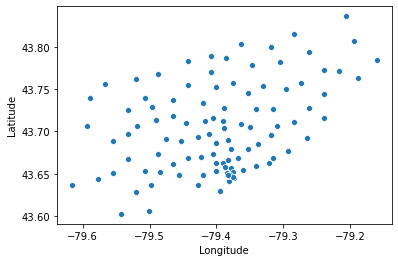

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.scatter(neighborhoods_locations['Longitude'], neighborhoods_locations['Latitude'])
sns.scatterplot(neighborhoods_locations['Longitude'], neighborhoods_locations['Latitude'], data=neighborhoods_locations)
plt.show()

In [56]:
neighborhoods = neighborhoods_locations
neighborhoods = neighborhoods_locations.drop('Postal Code',1)
neighborhoods = neighborhoods.rename(columns={'Neighbourhood': 'Neighborhood'})
neighborhoods.head()

Borough                                 Neighborhood   Latitude  \
0        North York                                    Parkwoods  43.753259   
1        North York                             Victoria Village  43.725882   
2  Downtown Toronto                    Regent Park, Harbourfront  43.654260   
3        North York             Lawrence Manor, Lawrence Heights  43.718518   
4  Downtown Toronto  Queen's Park, Ontario Provincial Government  43.662301   

   Longitude  
0 -79.329656  
1 -79.315572  
2 -79.360636  
3 -79.464763  
4 -79.389494

In [57]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In [58]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Toronto City, Ontario'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [59]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Downtonwn Toronto. So let's slice the original dataframe and create a new dataframe of the DT data.

In [60]:
DownT_data = neighborhoods[neighborhoods['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
DownT_data.head()

Borough                                 Neighborhood   Latitude  \
0  Downtown Toronto                    Regent Park, Harbourfront  43.654260   
1  Downtown Toronto  Queen's Park, Ontario Provincial Government  43.662301   
2  Downtown Toronto                     Garden District, Ryerson  43.657162   
3  Downtown Toronto                               St. James Town  43.651494   
4  Downtown Toronto                                  Berczy Park  43.644771   

   Longitude  
0 -79.360636  
1 -79.389494  
2 -79.378937  
3 -79.375418  
4 -79.373306

In [61]:
DownT_data

Borough                                       Neighborhood  \
0   Downtown Toronto                          Regent Park, Harbourfront   
1   Downtown Toronto        Queen's Park, Ontario Provincial Government   
2   Downtown Toronto                           Garden District, Ryerson   
3   Downtown Toronto                                     St. James Town   
4   Downtown Toronto                                        Berczy Park   
5   Downtown Toronto                                 Central Bay Street   
6   Downtown Toronto                                           Christie   
7   Downtown Toronto                           Richmond, Adelaide, King   
8   Downtown Toronto  Harbourfront East, Union Station, Toronto Islands   
9   Downtown Toronto           Toronto Dominion Centre, Design Exchange   
10  Downtown Toronto                     Commerce Court, Victoria Hotel   
11  Downtown Toronto                     University of Toronto, Harbord   
12  Downtown Toronto          Kensington Market, Chinatown, Grange Park   
13  Downtown Toronto  CN Tower, King and Spadina, Railway Lands, Har...   
14  Downtown Toronto                                           Rosedale   
15  Downtown Toronto                                     Stn A PO Boxes   
16  Downtown Toronto                        St. James Town, Cabbagetown   
17  Downtown Toronto             First Canadian Place, Underground city   
18  Downtown Toronto                               Church and Wellesley   

     Latitude  Longitude  
0   43.654260 -79.360636  
1   43.662301 -79.389494  
2   43.657162 -79.378937  
3   43.651494 -79.375418  
4   43.644771 -79.373306  
5   43.657952 -79.387383  
6   43.669542 -79.422564  
7   43.650571 -79.384568  
8   43.640816 -79.381752  
9   43.647177 -79.381576  
10  43.648198 -79.379817  
11  43.662696 -79.400049  
12  43.653206 -79.400049  
13  43.628947 -79.394420  
14  43.679563 -79.377529  
15  43.646435 -79.374846  
16  43.667967 -79.367675  
17  43.648429 -79.382280  
18  43.665860 -79.383160

As you can see, reading all table we can see different neighborhoods into the same Borough, not bad, but we need the location for each one, then we have to split them: 

In [62]:
DownT_data_Worked = DownT_data.assign(Neighborhood=DownT_data['Neighborhood'].str.split(',')).explode('Neighborhood')
DownT_data_Worked

Borough                    Neighborhood   Latitude  Longitude
0   Downtown Toronto                     Regent Park  43.654260 -79.360636
0   Downtown Toronto                    Harbourfront  43.654260 -79.360636
1   Downtown Toronto                    Queen's Park  43.662301 -79.389494
1   Downtown Toronto   Ontario Provincial Government  43.662301 -79.389494
2   Downtown Toronto                 Garden District  43.657162 -79.378937
2   Downtown Toronto                         Ryerson  43.657162 -79.378937
3   Downtown Toronto                  St. James Town  43.651494 -79.375418
4   Downtown Toronto                     Berczy Park  43.644771 -79.373306
5   Downtown Toronto              Central Bay Street  43.657952 -79.387383
6   Downtown Toronto                        Christie  43.669542 -79.422564
7   Downtown Toronto                        Richmond  43.650571 -79.384568
7   Downtown Toronto                        Adelaide  43.650571 -79.384568
7   Downtown Toronto                            King  43.650571 -79.384568
8   Downtown Toronto               Harbourfront East  43.640816 -79.381752
8   Downtown Toronto                   Union Station  43.640816 -79.381752
8   Downtown Toronto                 Toronto Islands  43.640816 -79.381752
9   Downtown Toronto         Toronto Dominion Centre  43.647177 -79.381576
9   Downtown Toronto                 Design Exchange  43.647177 -79.381576
10  Downtown Toronto                  Commerce Court  43.648198 -79.379817
10  Downtown Toronto                  Victoria Hotel  43.648198 -79.379817
11  Downtown Toronto           University of Toronto  43.662696 -79.400049
11  Downtown Toronto                         Harbord  43.662696 -79.400049
12  Downtown Toronto               Kensington Market  43.653206 -79.400049
12  Downtown Toronto                       Chinatown  43.653206 -79.400049
12  Downtown Toronto                     Grange Park  43.653206 -79.400049
13  Downtown Toronto                        CN Tower  43.628947 -79.394420
13  Downtown Toronto                King and Spadina  43.628947 -79.394420
13  Downtown Toronto                   Railway Lands  43.628947 -79.394420
13  Downtown Toronto               Harbourfront West  43.628947 -79.394420
13  Downtown Toronto                   Bathurst Quay  43.628947 -79.394420
13  Downtown Toronto                   South Niagara  43.628947 -79.394420
13  Downtown Toronto                  Island airport  43.628947 -79.394420
14  Downtown Toronto                        Rosedale  43.679563 -79.377529
15  Downtown Toronto                  Stn A PO Boxes  43.646435 -79.374846
16  Downtown Toronto                  St. James Town  43.667967 -79.367675
16  Downtown Toronto                     Cabbagetown  43.667967 -79.367675
17  Downtown Toronto            First Canadian Place  43.648429 -79.382280
17  Downtown Toronto                Underground city  43.648429 -79.382280
18  Downtown Toronto            Church and Wellesley  43.665860 -79.383160

After split the original table we have got the same locations for different neighborhoods, then we need to look for the correct ones. We have the correct data into the next lines, let's get it:

In [63]:
Dtdata = {'Borough':  ['Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto'],
        'Neighborhood': ['Regent Park','Harbourfront',"Queen's Park",'Ontario Provincial Government','Garden District','Ryerson','St. James Town','Berczy Park','Central Bay Street','Christie','Richmond','Adelaide','King','Harbourfront East','Union Station','Toronto Islands','Toronto Dominion Centre','Design Exchange','Commerce Court','Victoria Hotel','University of Toronto','Harbord','Kensington Market','Chinatown','Grange Park','CN Tower','King and Spadina','Railway Lands','Harbourfront West','Bathurst Quay','South Niagara','Island airport','Rosedale','Stn A PO Boxes','Cabbagetown','First Canadian Place','Underground city','Church and Wellesley', 'Corktown','Cabbagetown South'],
        'Latitude': ['43.659771','43.639001','43.664534','43.658156','43.657939','43.657519','43.669989','43.648116','43.657275','43.669542','43.647312','43.646693','43.642068','43.638749','43.64541','43.620848','43.6476139','43.6476981','43.648424','43.6480937','43.6629239','43.661167','43.65471','43.652846','43.654602','43.6426251','43.6454917','43.6451261','43.637804','43.635966','43.636856','43.630507','43.6809896','43.646435','43.6643958','43.6488945','43.648439','43.665473','43.654225','43.657306'],
        'Longitude': ['-79.361558','-79.385937','-79.392379','-79.386391','-79.376109','-79.378812','-79.373136','-79.374921','-79.384343','-79.422564','-79.399637','-79.391697','-79.41174','-79.381836','-79.380808','-79.38062','-79.384343','-79.3825166','-79.378719','-79.3792656','-79.397534','-79.404254','-79.402425','-79.39828','-79.393149','-79.389215','-79.3970839','-79.390514','-79.391765','-79.397378','-79.408751','-79.398431','-79.3827261','-79.374846','-79.3745184','-79.3830613','-79.380171','-79.380849','-79.360176','-79.367800'],
        }

downtown_data = pd.DataFrame (Dtdata, columns = ['Borough','Neighborhood','Latitude','Longitude'])
downtown_data['Latitude'] = pd.to_numeric(downtown_data['Latitude'])
downtown_data['Longitude'] = pd.to_numeric(downtown_data['Longitude'])
downtown_data

Borough                   Neighborhood   Latitude  Longitude
0   Downtown Toronto                    Regent Park  43.659771 -79.361558
1   Downtown Toronto                   Harbourfront  43.639001 -79.385937
2   Downtown Toronto                   Queen's Park  43.664534 -79.392379
3   Downtown Toronto  Ontario Provincial Government  43.658156 -79.386391
4   Downtown Toronto                Garden District  43.657939 -79.376109
5   Downtown Toronto                        Ryerson  43.657519 -79.378812
6   Downtown Toronto                 St. James Town  43.669989 -79.373136
7   Downtown Toronto                    Berczy Park  43.648116 -79.374921
8   Downtown Toronto             Central Bay Street  43.657275 -79.384343
9   Downtown Toronto                       Christie  43.669542 -79.422564
10  Downtown Toronto                       Richmond  43.647312 -79.399637
11  Downtown Toronto                       Adelaide  43.646693 -79.391697
12  Downtown Toronto                           King  43.642068 -79.411740
13  Downtown Toronto              Harbourfront East  43.638749 -79.381836
14  Downtown Toronto                  Union Station  43.645410 -79.380808
15  Downtown Toronto                Toronto Islands  43.620848 -79.380620
16  Downtown Toronto        Toronto Dominion Centre  43.647614 -79.384343
17  Downtown Toronto                Design Exchange  43.647698 -79.382517
18  Downtown Toronto                 Commerce Court  43.648424 -79.378719
19  Downtown Toronto                 Victoria Hotel  43.648094 -79.379266
20  Downtown Toronto          University of Toronto  43.662924 -79.397534
21  Downtown Toronto                        Harbord  43.661167 -79.404254
22  Downtown Toronto              Kensington Market  43.654710 -79.402425
23  Downtown Toronto                      Chinatown  43.652846 -79.398280
24  Downtown Toronto                    Grange Park  43.654602 -79.393149
25  Downtown Toronto                       CN Tower  43.642625 -79.389215
26  Downtown Toronto               King and Spadina  43.645492 -79.397084
27  Downtown Toronto                  Railway Lands  43.645126 -79.390514
28  Downtown Toronto              Harbourfront West  43.637804 -79.391765
29  Downtown Toronto                  Bathurst Quay  43.635966 -79.397378
30  Downtown Toronto                  South Niagara  43.636856 -79.408751
31  Downtown Toronto                 Island airport  43.630507 -79.398431
32  Downtown Toronto                       Rosedale  43.680990 -79.382726
33  Downtown Toronto                 Stn A PO Boxes  43.646435 -79.374846
34  Downtown Toronto                    Cabbagetown  43.664396 -79.374518
35  Downtown Toronto           First Canadian Place  43.648894 -79.383061
36  Downtown Toronto               Underground city  43.648439 -79.380171
37  Downtown Toronto           Church and Wellesley  43.665473 -79.380849
38  Downtown Toronto                       Corktown  43.654225 -79.360176
39  Downtown Toronto              Cabbagetown South  43.657306 -79.367800

Let's get the geographical coordinates of Downtown Toronto.

In [64]:
address = 'Downtown Toronto, Toronto'

geolocator = Nominatim(user_agent="dt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6541737, -79.38081164513409.


As we did with all of Toronto City, let's visualize in Downtown Toronto the neighborhoods on it.

In [65]:
# create map of Manhattan using latitude and longitude values
map_downtown_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(downtown_data['Latitude'], downtown_data['Longitude'], downtown_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downtown_toronto)  
    
map_downtown_toronto

#### Define Foursquare Credentials and Version

In [66]:
CLIENT_ID = '2E0HFCQ0UA0YLCFJF4JON3V40KXFQD4FAI2DYCWIRX4L04QU' # your Foursquare ID
CLIENT_SECRET = 'OPDP1W5CP4WSL35KLARVZGJYG3JNHBVED4ETX1WIUVSVBPMF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2E0HFCQ0UA0YLCFJF4JON3V40KXFQD4FAI2DYCWIRX4L04QU
CLIENT_SECRET:OPDP1W5CP4WSL35KLARVZGJYG3JNHBVED4ETX1WIUVSVBPMF


## Explore Neighborhoods in Downtown Toronto

#### Let's create a function to get the venues to all the neighborhoods in Downtown Toronto.

In [67]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *Downtown_venues*.

In [68]:
# type your answer here

downtown_venues = getNearbyVenues(names=downtown_data['Neighborhood'],
                                   latitudes=downtown_data['Latitude'],
                                   longitudes=downtown_data['Longitude']
                                  )


Regent Park
Harbourfront
Queen's Park
Ontario Provincial Government
Garden District
Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond
Adelaide
King
Harbourfront East
Union Station
Toronto Islands
Toronto Dominion Centre
Design Exchange
Commerce Court
Victoria Hotel
University of Toronto
Harbord
Kensington Market
Chinatown
Grange Park
CN Tower
King and Spadina
Railway Lands
Harbourfront West
Bathurst Quay
South Niagara
Island airport
Rosedale
Stn A PO Boxes
Cabbagetown
First Canadian Place
Underground city
Church and Wellesley
Corktown
Cabbagetown South


#### Let's check the size of the resulting dataframe

In [69]:
print(downtown_venues.shape)
downtown_venues.head()

(2655, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Regent Park              43.659771              -79.361558   
1  Regent Park              43.659771              -79.361558   
2  Regent Park              43.659771              -79.361558   
3  Regent Park              43.659771              -79.361558   
4  Regent Park              43.659771              -79.361558   

                        Venue  Venue Latitude  Venue Longitude  \
0  Regent Park Aquatic Centre       43.660600       -79.361392   
1            Daniels Spectrum       43.660137       -79.361808   
2             Sumach Espresso       43.658135       -79.359515   
3                   Sukhothai       43.658444       -79.365681   
4             Paintbox Bistro       43.660050       -79.362855   

          Venue Category  
0                   Pool  
1  Performing Arts Venue  
2            Coffee Shop  
3        Thai Restaurant  
4             Restaurant

### Let's realize than the Dowtown Toronto has 2655 venues and Manhattan has 3181!

Let's check how many venues were returned for each neighborhood

In [71]:
downtown_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                   
Adelaide                                         100                     100   
Bathurst Quay                                     27                      27   
Berczy Park                                      100                     100   
CN Tower                                          64                      64   
Cabbagetown                                       57                      57   
Cabbagetown South                                 32                      32   
Central Bay Street                                86                      86   
Chinatown                                         70                      70   
Christie                                          17                      17   
Church and Wellesley                              74                      74   
Commerce Court                                   100                     100   
Corktown                                          52                      52   
Design Exchange                                  100                     100   
First Canadian Place                             100                     100   
Garden District                                   89                      89   
Grange Park                                       49                      49   
Harbord                                           67                      67   
Harbourfront                                      96                      96   
Harbourfront East                                100                     100   
Harbourfront West                                 41                      41   
Island airport                                    23                      23   
Kensington Market                                100                     100   
King                                              71                      71   
King and Spadina                                  68                      68   
Ontario Provincial Government                     63                      63   
Queen's Park                                      35                      35   
Railway Lands                                     80                      80   
Regent Park                                       22                      22   
Richmond                                          94                      94   
Rosedale                                           4                       4   
Ryerson                                          100                     100   
South Niagara                                     14                      14   
St. James Town                                    35                      35   
Stn A PO Boxes                                    97                      97   
Toronto Dominion Centre                          100                     100   
Toronto Islands                                   11                      11   
Underground city                                 100                     100   
Union Station                                     92                      92   
University of Toronto                             25                      25   
Victoria Hotel                                   100                     100   

                               Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                            
Adelaide                         100             100              100   
Bathurst Quay                     27              27               27   
Berczy Park                      100             100              100   
CN Tower                          64              64               64   
Cabbagetown                       57              57               57   
Cabbagetown South                 32              32               32   
Central Bay Street                86              86               86   
Chinatown    

#### Let's find out how many unique categories can be curated from all the returned venues

In [72]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 256 uniques categories.


Let's realize (again) there are only 256 unique cateogries in comparison with 324 in Manhattan.

## Analyze Each Neighborhood

In [73]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

Yoga Studio  Accessories Store  Airport  Airport Food Court  Airport Gate  \
0            0                  0        0                   0             0   
1            0                  0        0                   0             0   
2            0                  0        0                   0             0   
3            0                  0        0                   0             0   
4            0                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Animal Shelter  Antique Shop  Aquarium  Arcade  Art Gallery  Art Museum  \
0               0             0         0       0            0           0   
1               0             0         0       0            0           0   
2               0             0         0       0            0           0   
3               0             0         0       0            0           0   
4               0             0         0       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Dealership  \
0                    0                 0                   0                0   
1                    0                 0                   0                0   
2                    0                 0                   0                0   
3                    0                 0                   0                0   
4                    0                 0                   0                0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    0               0   
2          0           0           0       0     0    0               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    0               0   

   Baseball Stadium  Basketball Stadium  Bed & Breakfast  Beer Bar  \
0                 0                   0                0         0   
1                 0                   0                0         0   
2                 0                   0                0         0   
3                 0                   0                0         0   
4                 0                   0                0         0   

   Beer Garden  Beer Store  Belgian Restaurant  Bike Rental / Bike Share  \
0            0           0                   0                         0   
1            0           0                   0                         0   
2            0           0                   0                         0   
3            0           0                   0                         0   
4            0           0                   0                         0   

   Bike Shop  Bistro  Board Shop  Boat or Ferry  Bookstore  Botanical Garden  \
0          0       0           0              0          0                 0   
1          0       0           0              0          0                 0   
2          0       0           0              0          0                 0   
3          0       0           0              0          0                 0   
4          0       0           0              0          0                 0   

   Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
0         0                     0               0        0                0   
1         0                     0               0        0                0   
2         0                     0               0       

And let's examine the new dataframe size.

In [74]:
downtown_onehot.shape

(2655, 256)

There is a mistake, should be 257 columns, and are only 256.
The first column is not Neighborhoods.
We have to make an adicional check.

In [75]:
if 'Neighborhood' in downtown_onehot.columns:
    print('yes')
else:
    print('no')

yes


In [76]:
downtown_onehot['Neighborhood'].head()

0    Regent Park
1    Regent Park
2    Regent Park
3    Regent Park
4    Regent Park
Name: Neighborhood, dtype: object

In [77]:
downtown_venues.loc[downtown_venues['Venue Category']=='Neighborhood']

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
44         Harbourfront              43.639001              -79.385937   
567  Central Bay Street              43.657275              -79.384343   
910   Harbourfront East              43.638749              -79.381836   

                Venue  Venue Latitude  Venue Longitude Venue Category  
44       Harbourfront       43.639526       -79.380688   Neighborhood  
567  Downtown Toronto       43.653232       -79.385296   Neighborhood  
910      Harbourfront       43.639526       -79.380688   Neighborhood

In [78]:
downtown_venues.drop(downtown_venues[downtown_venues['Venue Category']=='Neighborhood'].index, inplace=True)

In [79]:
print(downtown_venues.shape)
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))
print("We have erased the Venue Categories with the name 'Neighborhood', let's do the same job again")

(2652, 7)
There are 255 uniques categories.
We have erased the Venue Categories with the name 'Neighborhood', let's do the same job again


In [80]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

Neighborhood  Accessories Store  Airport  Airport Food Court  Airport Gate  \
0  Regent Park                  0        0                   0             0   
1  Regent Park                  0        0                   0             0   
2  Regent Park                  0        0                   0             0   
3  Regent Park                  0        0                   0             0   
4  Regent Park                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Animal Shelter  Antique Shop  Aquarium  Arcade  Art Gallery  Art Museum  \
0               0             0         0       0            0           0   
1               0             0         0       0            0           0   
2               0             0         0       0            0           0   
3               0             0         0       0            0           0   
4               0             0         0       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Dealership  \
0                    0                 0                   0                0   
1                    0                 0                   0                0   
2                    0                 0                   0                0   
3                    0                 0                   0                0   
4                    0                 0                   0                0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    0               0   
2          0           0           0       0     0    0               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    0               0   

   Baseball Stadium  Basketball Stadium  Bed & Breakfast  Beer Bar  \
0                 0                   0                0         0   
1                 0                   0                0         0   
2                 0                   0                0         0   
3                 0                   0                0         0   
4                 0                   0                0         0   

   Beer Garden  Beer Store  Belgian Restaurant  Bike Rental / Bike Share  \
0            0           0                   0                         0   
1            0           0                   0                         0   
2            0           0                   0                         0   
3            0           0                   0                         0   
4            0           0                   0                         0   

   Bike Shop  Bistro  Board Shop  Boat or Ferry  Bookstore  Botanical Garden  \
0          0       0           0              0          0                 0   
1          0       0           0              0          0                 0   
2          0       0           0              0          0                 0   
3          0       0           0              0          0                 0   
4          0       0           0              0          0                 0   

   Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
0         0                     0               0        0                0   
1         0                     0               0        0                0   
2         0                     0               0      

In [81]:
pd.set_option('max_columns', None)
downtown_onehot.head()

Neighborhood  Accessories Store  Airport  Airport Food Court  Airport Gate  \
0  Regent Park                  0        0                   0             0   
1  Regent Park                  0        0                   0             0   
2  Regent Park                  0        0                   0             0   
3  Regent Park                  0        0                   0             0   
4  Regent Park                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Animal Shelter  Antique Shop  Aquarium  Arcade  Art Gallery  Art Museum  \
0               0             0         0       0            0           0   
1               0             0         0       0            0           0   
2               0             0         0       0            0           0   
3               0             0         0       0            0           0   
4               0             0         0       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Dealership  \
0                    0                 0                   0                0   
1                    0                 0                   0                0   
2                    0                 0                   0                0   
3                    0                 0                   0                0   
4                    0                 0                   0                0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    0               0   
2          0           0           0       0     0    0               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    0               0   

   Baseball Stadium  Basketball Stadium  Bed & Breakfast  Beer Bar  \
0                 0                   0                0         0   
1                 0                   0                0         0   
2                 0                   0                0         0   
3                 0                   0                0         0   
4                 0                   0                0         0   

   Beer Garden  Beer Store  Belgian Restaurant  Bike Rental / Bike Share  \
0            0           0                   0                         0   
1            0           0                   0                         0   
2            0           0                   0                         0   
3            0           0                   0                         0   
4            0           0                   0                         0   

   Bike Shop  Bistro  Board Shop  Boat or Ferry  Bookstore  Botanical Garden  \
0          0       0           0              0          0                 0   
1          0       0           0              0          0                 0   
2          0       0           0              0          0                 0   
3          0       0           0              0          0                 0   
4          0       0           0              0          0                 0   

   Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
0         0                     0               0        0                0   
1         0                     0               0        0                0   
2         0                     0               0      

In [82]:
downtown_onehot.shape

(2652, 256)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [83]:
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped

Neighborhood  Accessories Store   Airport  \
0                        Adelaide           0.000000  0.000000   
1                   Bathurst Quay           0.000000  0.037037   
2                     Berczy Park           0.000000  0.000000   
3                        CN Tower           0.000000  0.000000   
4                     Cabbagetown           0.000000  0.000000   
5               Cabbagetown South           0.000000  0.000000   
6              Central Bay Street           0.000000  0.000000   
7                       Chinatown           0.000000  0.000000   
8                        Christie           0.000000  0.000000   
9            Church and Wellesley           0.000000  0.000000   
10                 Commerce Court           0.000000  0.000000   
11                       Corktown           0.000000  0.000000   
12                Design Exchange           0.000000  0.000000   
13           First Canadian Place           0.000000  0.000000   
14                Garden District           0.000000  0.000000   
15                    Grange Park           0.000000  0.000000   
16                        Harbord           0.000000  0.000000   
17                   Harbourfront           0.000000  0.000000   
18              Harbourfront East           0.000000  0.000000   
19              Harbourfront West           0.000000  0.000000   
20                 Island airport           0.000000  0.043478   
21              Kensington Market           0.000000  0.000000   
22                           King           0.014085  0.000000   
23               King and Spadina           0.000000  0.000000   
24  Ontario Provincial Government           0.000000  0.000000   
25                   Queen's Park           0.000000  0.000000   
26                  Railway Lands           0.000000  0.000000   
27                    Regent Park           0.000000  0.000000   
28                       Richmond           0.000000  0.000000   
29                       Rosedale           0.000000  0.000000   
30                        Ryerson           0.000000  0.000000   
31                  South Niagara           0.000000  0.000000   
32                 St. James Town           0.000000  0.000000   
33                 Stn A PO Boxes           0.000000  0.000000   
34        Toronto Dominion Centre           0.000000  0.000000   
35                Toronto Islands           0.000000  0.000000   
36               Underground city           0.000000  0.000000   
37                  Union Station           0.000000  0.000000   
38          University of Toronto           0.000000  0.000000   
39                 Victoria Hotel           0.000000  0.000000   

    Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0             0.000000      0.000000        0.000000         0.000000   
1             0.000000      0.000000        0.000000         0.037037   
2             0.000000      0.000000        0.000000         0.000000   
3             0.000000      0.000000        0.000000         0.000000   
4             0.000000      0.000000        0.000000         0.000000   
5             0.000000      0.000000        0.000000         0.000000   
6             0.000000      0.000000        0.000000         0.000000   
7             0.000000      0.000000        0.000000         0.000000   
8             0.000000      0.000000        0.000000         0.000000   
9             0.000000      0.000000        0.000000         0.000000   
10            0.000000      0.000000        0.000000         0.000000   
11            0.000000      0.000000        0.000000         0.000000   
12            0.000000      0.000000        0.000000         0.000000   
13            0.000000      0.000000        0.000000         0.000000   
14            0.000000      0.000000        0.000000         0.000000   
15            0.000000      0.000000        0.000000         0.000000   
16            0.000000      0.000000        0.000000         0.000000   


#### Let's confirm the new size

In [84]:
downtown_grouped.shape

(40, 256)

#### Let's print each neighborhood along with the top 5 most common venues

In [85]:
num_top_venues = 5

for hood in downtown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide----
             venue  freq
0      Coffee Shop  0.06
1            Hotel  0.06
2  Thai Restaurant  0.03
3           Lounge  0.03
4             Café  0.03


----Bathurst Quay----
                  venue  freq
0           Coffee Shop  0.19
1                  Café  0.11
2                  Park  0.07
3  Caribbean Restaurant  0.04
4      Sculpture Garden  0.04


----Berczy Park----
                 venue  freq
0          Coffee Shop  0.08
1                 Café  0.06
2  Japanese Restaurant  0.04
3   Italian Restaurant  0.04
4                Hotel  0.04


----CN Tower----
         venue  freq
0        Hotel  0.08
1  Coffee Shop  0.06
2  Pizza Place  0.05
3          Gym  0.05
4     Aquarium  0.05


----Cabbagetown----
                 venue  freq
0          Coffee Shop  0.09
1              Gay Bar  0.09
2  Japanese Restaurant  0.05
3          Pizza Place  0.04
4                  Pub  0.04


----Cabbagetown South----
             venue  freq
0   Sandwich Place  0.09
1      Coffee 

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [86]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [87]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Adelaide                 Hotel           Coffee Shop   
1  Bathurst Quay           Coffee Shop                  Café   
2    Berczy Park           Coffee Shop                  Café   
3       CN Tower                 Hotel           Coffee Shop   
4    Cabbagetown           Coffee Shop               Gay Bar   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Italian Restaurant                Lounge                   Bar   
1                  Park       Harbor / Marina      Ramen Restaurant   
2   Japanese Restaurant    Italian Restaurant                 Hotel   
3              Aquarium                   Gym           Pizza Place   
4   Japanese Restaurant          Liquor Store                 Diner   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0       Thai Restaurant            Restaurant                  Café   
1      Sculpture Garden        Scenic Lookout                 Diner   
2            Restaurant        Breakfast Spot    Seafood Restaurant   
3                  Park        Scenic Lookout      Baseball Stadium   
4             Gastropub           Pizza Place                   Pub   

  9th Most Common Venue 10th Most Common Venue  
0           Pizza Place                  Diner  
1      Sushi Restaurant                   Bank  
2                   Gym              Gastropub  
3                   Bar             Restaurant  
4           Men's Store       Sculpture Garden

## Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [88]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [89]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = downtown_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_merged.head() # check the last columns!

Borough                   Neighborhood   Latitude  Longitude  \
0  Downtown Toronto                    Regent Park  43.659771 -79.361558   
1  Downtown Toronto                   Harbourfront  43.639001 -79.385937   
2  Downtown Toronto                   Queen's Park  43.664534 -79.392379   
3  Downtown Toronto  Ontario Provincial Government  43.658156 -79.386391   
4  Downtown Toronto                Garden District  43.657939 -79.376109   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               1           Coffee Shop       Thai Restaurant   
1               1           Coffee Shop              Aquarium   
2               1           Coffee Shop                  Café   
3               1           Coffee Shop    Italian Restaurant   
4               1           Coffee Shop        Sandwich Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Pub            Beer Store  Fast Food Restaurant   
1                   Gym           Pizza Place         Boat or Ferry   
2      Sushi Restaurant                  Park        Sandwich Place   
3                  Café        Sandwich Place          Burger Joint   
4           Pizza Place                  Café                 Hotel   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Sushi Restaurant            Food Truck       Auto Dealership   
1             Scenic Lookout      Baseball Stadium               Brewery   
2                Pizza Place          Concert Hall     Convenience Store   
3                  Juice Bar       Thai Restaurant       Bubble Tea Shop   
4  Middle Eastern Restaurant                 Diner            Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0            Restaurant      Indian Restaurant  
1                  Café                    Bar  
2        Clothing Store         Cosmetics Shop  
3           Salad Place    Japanese Restaurant  
4      Ramen Restaurant          Tanning Salon

Finally, let's visualize the resulting clusters

In [90]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighborhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [91]:
downtown_merged

Borough                   Neighborhood   Latitude  Longitude  \
0   Downtown Toronto                    Regent Park  43.659771 -79.361558   
1   Downtown Toronto                   Harbourfront  43.639001 -79.385937   
2   Downtown Toronto                   Queen's Park  43.664534 -79.392379   
3   Downtown Toronto  Ontario Provincial Government  43.658156 -79.386391   
4   Downtown Toronto                Garden District  43.657939 -79.376109   
5   Downtown Toronto                        Ryerson  43.657519 -79.378812   
6   Downtown Toronto                 St. James Town  43.669989 -79.373136   
7   Downtown Toronto                    Berczy Park  43.648116 -79.374921   
8   Downtown Toronto             Central Bay Street  43.657275 -79.384343   
9   Downtown Toronto                       Christie  43.669542 -79.422564   
10  Downtown Toronto                       Richmond  43.647312 -79.399637   
11  Downtown Toronto                       Adelaide  43.646693 -79.391697   
12  Downtown Toronto                           King  43.642068 -79.411740   
13  Downtown Toronto              Harbourfront East  43.638749 -79.381836   
14  Downtown Toronto                  Union Station  43.645410 -79.380808   
15  Downtown Toronto                Toronto Islands  43.620848 -79.380620   
16  Downtown Toronto        Toronto Dominion Centre  43.647614 -79.384343   
17  Downtown Toronto                Design Exchange  43.647698 -79.382517   
18  Downtown Toronto                 Commerce Court  43.648424 -79.378719   
19  Downtown Toronto                 Victoria Hotel  43.648094 -79.379266   
20  Downtown Toronto          University of Toronto  43.662924 -79.397534   
21  Downtown Toronto                        Harbord  43.661167 -79.404254   
22  Downtown Toronto              Kensington Market  43.654710 -79.402425   
23  Downtown Toronto                      Chinatown  43.652846 -79.398280   
24  Downtown Toronto                    Grange Park  43.654602 -79.393149   
25  Downtown Toronto                       CN Tower  43.642625 -79.389215   
26  Downtown Toronto               King and Spadina  43.645492 -79.397084   
27  Downtown Toronto                  Railway Lands  43.645126 -79.390514   
28  Downtown Toronto              Harbourfront West  43.637804 -79.391765   
29  Downtown Toronto                  Bathurst Quay  43.635966 -79.397378   
30  Downtown Toronto                  South Niagara  43.636856 -79.408751   
31  Downtown Toronto                 Island airport  43.630507 -79.398431   
32  Downtown Toronto                       Rosedale  43.680990 -79.382726   
33  Downtown Toronto                 Stn A PO Boxes  43.646435 -79.374846   
34  Downtown Toronto                    Cabbagetown  43.664396 -79.374518   
35  Downtown Toronto           First Canadian Place  43.648894 -79.383061   
36  Downtown Toronto               Underground city  43.648439 -79.380171   
37  Downtown Toronto           Church and Wellesley  43.665473 -79.380849   
38  Downtown Toronto                       Corktown  43.654225 -79.360176   
39  Downtown Toronto              Cabbagetown South  43.657306 -79.367800   

    Cluster Labels 1st Most Common Venue   2nd Most Common Venue  \
0                1           Coffee Shop         Thai Restaurant   
1                1           Coffee Shop                Aquarium   
2                1           Coffee Shop                    Café   
3                1           Coffee Shop      Italian Restaurant   
4                1           Coffee Shop          Sandwich Place   
5                1           Coffee Shop          Clothing Store   
6                1           Coffee Shop           Grocery Store   
7                1           Coffee Shop                    Café   
8                1           Coffee Shop          Sandwich Place   
9                3         Grocery Store                    Café   
10               1           Coffee Shop  Furniture / Home Store   
11               1                 Hote

## Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [92]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 0, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
20  University of Toronto                  Café             Bookstore   
30          South Niagara                  Park                   Gym   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
20                  Park    Italian Restaurant    Falafel Restaurant   
30         Historic Site           Pizza Place                   Bar   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
20  Mediterranean Restaurant          Noodle House        Sandwich Place   
30                  Bus Stop   Arts & Crafts Store                 Trail   

   9th Most Common Venue 10th Most Common Venue  
20     French Restaurant                   Bank  
30                  Café            Coffee Shop

#### Cluster 2

In [93]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 1, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
0                     Regent Park           Coffee Shop   
1                    Harbourfront           Coffee Shop   
2                    Queen's Park           Coffee Shop   
3   Ontario Provincial Government           Coffee Shop   
4                 Garden District           Coffee Shop   
5                         Ryerson           Coffee Shop   
6                  St. James Town           Coffee Shop   
7                     Berczy Park           Coffee Shop   
8              Central Bay Street           Coffee Shop   
10                       Richmond           Coffee Shop   
11                       Adelaide                 Hotel   
12                           King           Coffee Shop   
13              Harbourfront East           Coffee Shop   
14                  Union Station           Coffee Shop   
16        Toronto Dominion Centre           Coffee Shop   
17                Design Exchange           Coffee Shop   
18                 Commerce Court           Coffee Shop   
19                 Victoria Hotel           Coffee Shop   
21                        Harbord                  Café   
22              Kensington Market                   Bar   
23                      Chinatown          Dessert Shop   
24                    Grange Park           Coffee Shop   
25                       CN Tower                 Hotel   
26               King and Spadina           Coffee Shop   
27                  Railway Lands           Coffee Shop   
28              Harbourfront West           Coffee Shop   
29                  Bathurst Quay           Coffee Shop   
33                 Stn A PO Boxes           Coffee Shop   
34                    Cabbagetown           Coffee Shop   
35           First Canadian Place           Coffee Shop   
36               Underground city           Coffee Shop   
37           Church and Wellesley           Coffee Shop   
38                       Corktown           Coffee Shop   
39              Cabbagetown South           Coffee Shop   

     2nd Most Common Venue          3rd Most Common Venue  \
0          Thai Restaurant                            Pub   
1                 Aquarium                            Gym   
2                     Café               Sushi Restaurant   
3       Italian Restaurant                           Café   
4           Sandwich Place                    Pizza Place   
5           Clothing Store                 Cosmetics Shop   
6            Grocery Store                    Pizza Place   
7                     Café            Japanese Restaurant   
8           Sandwich Place                 Clothing Store   
10  Furniture / Home Store                           Café   
11             Coffee Shop             Italian Restaurant   
12              Restaurant                           Park   
13           Boat or Ferry                     Restaurant   
14                    Café                          Hotel   
16                   Hotel                           Café   
17                   Hotel                           Café   
18              Restaurant                          Hotel   
19                    Café                     Restaurant   
21          Sandwich Place                    Pizza Place   
22                    Café  Vegetarian / Vegan Restaurant   
23                     Bar  Vegetarian / Vegan Restaurant   
24          Sandwich Place                           Café   
25             Coffee Shop                       Aquarium   
26      Italian Restaurant              French Restaurant   
27      Italian Restaurant                          Hotel   
28                    Café                            Gym   
29                    Café                           Park   
33                     Pub                           Café   
34                 Gay Bar            Japanese Restaurant   
35                    Café            Japanese Restaurant   
36                    Café                     Restaurant   
37 

#### Cluster 3

In [94]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 2, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
15  Toronto Islands          Burger Joint       Harbor / Marina   
31   Island airport       Harbor / Marina   Rental Car Location   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
15  Fast Food Restaurant             BBQ Joint                  Park   
31           Coffee Shop        Airport Lounge      Airport Terminal   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
15           Music Venue         Boat or Ferry                   Bar   
31                  Pier                Tunnel                   Bar   

   9th Most Common Venue 10th Most Common Venue  
15           Pizza Place       Greek Restaurant  
31                  Park                  Plane

#### Cluster 4

In [95]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 3, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
9     Christie         Grocery Store                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
9                  Park    Athletics & Sports           Candy Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
9                 Diner    Italian Restaurant            Restaurant   

  9th Most Common Venue 10th Most Common Venue  
9             Nightclub            Coffee Shop

#### Cluster 5

In [96]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 4, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
32     Rosedale    Athletics & Sports            Playground   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
32          Tennis Court                  Park      Doner Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
32        Discount Store   Distribution Center              Dive Bar   

   9th Most Common Venue 10th Most Common Venue  
32               Dog Run             Donut Shop

Now that we have the cluster for each place, let's look for similarities between them:

In [97]:
neighborhoodsMHDT_venues_sorted = pd.concat([manhattan_merged, downtown_merged], ignore_index=True)
neighborhoodsMHDT_venues_sorted = neighborhoodsMHDT_venues_sorted.drop(['Cluster Labels','Borough','Latitude','Longitude'],1)
neighborhoodsMHDT_venues_sorted

Neighborhood 1st Most Common Venue  \
0                     Marble Hill           Coffee Shop   
1                       Chinatown    Chinese Restaurant   
2              Washington Heights                  Café   
3                          Inwood                Lounge   
4                Hamilton Heights           Pizza Place   
5                  Manhattanville    Seafood Restaurant   
6                  Central Harlem    African Restaurant   
7                     East Harlem    Mexican Restaurant   
8                 Upper East Side    Italian Restaurant   
9                       Yorkville    Italian Restaurant   
10                     Lenox Hill           Coffee Shop   
11               Roosevelt Island                  Park   
12                Upper West Side    Italian Restaurant   
13                 Lincoln Square                 Plaza   
14                        Clinton               Theater   
15                        Midtown                 Hotel   
16                    Murray Hill                 Hotel   
17                        Chelsea           Coffee Shop   
18              Greenwich Village    Italian Restaurant   
19                   East Village                   Bar   
20                Lower East Side    Chinese Restaurant   
21                        Tribeca   American Restaurant   
22                   Little Italy                Bakery   
23                           Soho    Italian Restaurant   
24                   West Village    Italian Restaurant   
25               Manhattan Valley           Coffee Shop   
26            Morningside Heights                  Park   
27                       Gramercy                   Bar   
28              Battery Park City                  Park   
29             Financial District           Coffee Shop   
30                  Carnegie Hill           Coffee Shop   
31                           Noho    Italian Restaurant   
32                   Civic Center           Coffee Shop   
33                  Midtown South     Korean Restaurant   
34                   Sutton Place    Italian Restaurant   
35                     Turtle Bay    Italian Restaurant   
36                     Tudor City                  Park   
37                Stuyvesant Town                  Park   
38                       Flatiron   Japanese Restaurant   
39                   Hudson Yards                 Hotel   
40                    Regent Park           Coffee Shop   
41                   Harbourfront           Coffee Shop   
42                   Queen's Park           Coffee Shop   
43  Ontario Provincial Government           Coffee Shop   
44                Garden District           Coffee Shop   
45                        Ryerson           Coffee Shop   
46                 St. James Town           Coffee Shop   
47                    Berczy Park           Coffee Shop   
48             Central Bay Street           Coffee Shop   
49                       Christie         Grocery Store   
50                       Richmond           Coffee Shop   
51                       Adelaide                 Hotel   
52                           King           Coffee Shop   
53              Harbourfront East           Coffee Shop   
54                  Union Station           Coffee Shop   
55                Toronto Islands          Burger Joint   
56        Toronto Dominion Centre           Coffee Shop   
57                Design Exchange           Coffee Shop   
58                 Commerce Court           Coffee Shop   
59                 Victoria Hotel           Coffee Shop   
60          University of Toronto                  Café   
61                        Harbord                  Café   
62              Kensington Market                   Bar   
63                      Chinatown          Dessert Shop   
64                    Grange Park           Coffee Shop   
65                       CN Tower                 Hotel   
66               King and Spadina           Coffee Shop   
67       

In [98]:
cities_grouped = pd.concat([manhattan_grouped, downtown_grouped], ignore_index=True)
cities_grouped = cities_grouped.fillna(0)
cities_grouped

Neighborhood  Accessories Store  Adult Boutique  \
0               Battery Park City           0.000000            0.00   
1                   Carnegie Hill           0.000000            0.00   
2                  Central Harlem           0.000000            0.00   
3                         Chelsea           0.000000            0.00   
4                       Chinatown           0.000000            0.00   
5                    Civic Center           0.000000            0.00   
6                         Clinton           0.000000            0.00   
7                     East Harlem           0.000000            0.00   
8                    East Village           0.000000            0.00   
9              Financial District           0.000000            0.00   
10                       Flatiron           0.010000            0.00   
11                       Gramercy           0.000000            0.00   
12              Greenwich Village           0.000000            0.00   
13               Hamilton Heights           0.000000            0.00   
14                   Hudson Yards           0.000000            0.00   
15                         Inwood           0.000000            0.00   
16                     Lenox Hill           0.000000            0.00   
17                 Lincoln Square           0.000000            0.00   
18                   Little Italy           0.000000            0.00   
19                Lower East Side           0.000000            0.00   
20               Manhattan Valley           0.000000            0.00   
21                 Manhattanville           0.000000            0.00   
22                    Marble Hill           0.000000            0.00   
23                        Midtown           0.000000            0.00   
24                  Midtown South           0.000000            0.00   
25            Morningside Heights           0.000000            0.00   
26                    Murray Hill           0.000000            0.00   
27                           Noho           0.000000            0.00   
28               Roosevelt Island           0.000000            0.00   
29                           Soho           0.000000            0.00   
30                Stuyvesant Town           0.000000            0.00   
31                   Sutton Place           0.000000            0.01   
32                        Tribeca           0.000000            0.00   
33                     Tudor City           0.000000            0.00   
34                     Turtle Bay           0.000000            0.00   
35                Upper East Side           0.000000            0.00   
36                Upper West Side           0.010989            0.00   
37             Washington Heights           0.011494            0.00   
38                   West Village           0.010000            0.01   
39                      Yorkville           0.000000            0.00   
40                       Adelaide           0.000000            0.00   
41                  Bathurst Quay           0.000000            0.00   
42                    Berczy Park           0.000000            0.00   
43                       CN Tower           0.000000            0.00   
44                    Cabbagetown           0.000000            0.00   
45              Cabbagetown South           0.000000            0.00   
46             Central Bay Street           0.000000            0.00   
47                      Chinatown           0.000000            0.00   
48                       Christie           0.000000            0.00   
49           Church and Wellesley           0.000000            0.00   
50                 Commerce Court           0.000000            0.00   
51                       Corktown           0.000000            0.00   
52                Design Exchange           0.000000            0.00   
53           First Canadian Place           0.000000            0.00   
54                Garden District           0.000000         

In [99]:
cities_data = pd.concat([manhattan_data, downtown_data], ignore_index=True)
cities_data

Borough                   Neighborhood   Latitude  Longitude
0          Manhattan                    Marble Hill  40.876551 -73.910660
1          Manhattan                      Chinatown  40.715618 -73.994279
2          Manhattan             Washington Heights  40.851903 -73.936900
3          Manhattan                         Inwood  40.867684 -73.921210
4          Manhattan               Hamilton Heights  40.823604 -73.949688
5          Manhattan                 Manhattanville  40.816934 -73.957385
6          Manhattan                 Central Harlem  40.815976 -73.943211
7          Manhattan                    East Harlem  40.792249 -73.944182
8          Manhattan                Upper East Side  40.775639 -73.960508
9          Manhattan                      Yorkville  40.775930 -73.947118
10         Manhattan                     Lenox Hill  40.768113 -73.958860
11         Manhattan               Roosevelt Island  40.762160 -73.949168
12         Manhattan                Upper West Side  40.787658 -73.977059
13         Manhattan                 Lincoln Square  40.773529 -73.985338
14         Manhattan                        Clinton  40.759101 -73.996119
15         Manhattan                        Midtown  40.754691 -73.981669
16         Manhattan                    Murray Hill  40.748303 -73.978332
17         Manhattan                        Chelsea  40.744035 -74.003116
18         Manhattan              Greenwich Village  40.726933 -73.999914
19         Manhattan                   East Village  40.727847 -73.982226
20         Manhattan                Lower East Side  40.717807 -73.980890
21         Manhattan                        Tribeca  40.721522 -74.010683
22         Manhattan                   Little Italy  40.719324 -73.997305
23         Manhattan                           Soho  40.722184 -74.000657
24         Manhattan                   West Village  40.734434 -74.006180
25         Manhattan               Manhattan Valley  40.797307 -73.964286
26         Manhattan            Morningside Heights  40.808000 -73.963896
27         Manhattan                       Gramercy  40.737210 -73.981376
28         Manhattan              Battery Park City  40.711932 -74.016869
29         Manhattan             Financial District  40.707107 -74.010665
30         Manhattan                  Carnegie Hill  40.782683 -73.953256
31         Manhattan                           Noho  40.723259 -73.988434
32         Manhattan                   Civic Center  40.715229 -74.005415
33         Manhattan                  Midtown South  40.748510 -73.988713
34         Manhattan                   Sutton Place  40.760280 -73.963556
35         Manhattan                     Turtle Bay  40.752042 -73.967708
36         Manhattan                     Tudor City  40.746917 -73.971219
37         Manhattan                Stuyvesant Town  40.731000 -73.974052
38         Manhattan                       Flatiron  40.739673 -73.990947
39         Manhattan                   Hudson Yards  40.756658 -74.000111
40  Downtown Toronto                    Regent Park  43.659771 -79.361558
41  Downtown Toronto                   Harbourfront  43.639001 -79.385937
42  Downtown Toronto                   Queen's Park  43.664534 -79.392379
43  Downtown Toronto  Ontario Provincial Government  43.658156 -79.386391
44  Downtown Toronto                Garden District  43.657939 -79.376109
45  Downtown Toronto                        Ryerson  43.657519 -79.378812
46  Downtown Toronto                 St. James Town  43.669989 -79.373136
47  Downtown Toronto                    Berczy Park  43.648116 -79.374921
48  Downtown Toronto             Central Bay Street  43.657275 -79.384343
49  Downtown Toronto                       Christie  43.669542 -79.422564
50  Downtown Toronto                       Richmond  43.647312 -79.399637
51  Downtown Toronto                       Adelaide  43.646693 -79.391697
52  Downtown Toronto                           King  43.642068 -79.411740
53  Downtown Toro

In [100]:
# set number of clusters
kclusters = 5

cities_grouped_clustering = cities_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [101]:
# add clustering labels
neighborhoodsMHDT_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cities_merged = cities_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cities_merged = cities_merged.join(neighborhoodsMHDT_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

cities_merged.head() # check the last columns!

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Manhattan         Marble Hill  40.876551 -73.910660               4   
1  Manhattan           Chinatown  40.715618 -73.994279               4   
1  Manhattan           Chinatown  40.715618 -73.994279               4   
2  Manhattan  Washington Heights  40.851903 -73.936900               4   
3  Manhattan              Inwood  40.867684 -73.921210               4   

  1st Most Common Venue 2nd Most Common Venue          3rd Most Common Venue  \
0           Coffee Shop        Discount Store                 Sandwich Place   
1    Chinese Restaurant          Cocktail Bar                   Dessert Shop   
1          Dessert Shop                   Bar  Vegetarian / Vegan Restaurant   
2                  Café                Bakery              Mobile Phone Shop   
3                Lounge    Mexican Restaurant                     Restaurant   

  4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
0                   Gym            Yoga Studio            Kids Store   
1                Bakery  Vietnamese Restaurant          Noodle House   
1           Coffee Shop                   Café    Mexican Restaurant   
2                  Bank     Spanish Restaurant        Sandwich Place   
3                  Café     Spanish Restaurant    Frozen Yogurt Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0         Ice Cream Shop              Pharmacy         Deli / Bodega   
1           Optical Shop                   Spa     Hotpot Restaurant   
1  Vietnamese Restaurant        Ice Cream Shop         Grocery Store   
2                   Park            Donut Shop      Tapas Restaurant   
3                 Bakery  Caribbean Restaurant    Chinese Restaurant   

  10th Most Common Venue  
0       Department Store  
1    American Restaurant  
1    Dumpling Restaurant  
2        Supplement Shop  
3                   Park

In [102]:
# create map
mapMHDT_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['Neighborhood'], cities_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(mapMHDT_clusters)
       
mapMHDT_clusters

In [103]:
cities_merged

Borough                   Neighborhood   Latitude  Longitude  \
0          Manhattan                    Marble Hill  40.876551 -73.910660   
1          Manhattan                      Chinatown  40.715618 -73.994279   
1          Manhattan                      Chinatown  40.715618 -73.994279   
2          Manhattan             Washington Heights  40.851903 -73.936900   
3          Manhattan                         Inwood  40.867684 -73.921210   
4          Manhattan               Hamilton Heights  40.823604 -73.949688   
5          Manhattan                 Manhattanville  40.816934 -73.957385   
6          Manhattan                 Central Harlem  40.815976 -73.943211   
7          Manhattan                    East Harlem  40.792249 -73.944182   
8          Manhattan                Upper East Side  40.775639 -73.960508   
9          Manhattan                      Yorkville  40.775930 -73.947118   
10         Manhattan                     Lenox Hill  40.768113 -73.958860   
11         Manhattan               Roosevelt Island  40.762160 -73.949168   
12         Manhattan                Upper West Side  40.787658 -73.977059   
13         Manhattan                 Lincoln Square  40.773529 -73.985338   
14         Manhattan                        Clinton  40.759101 -73.996119   
15         Manhattan                        Midtown  40.754691 -73.981669   
16         Manhattan                    Murray Hill  40.748303 -73.978332   
17         Manhattan                        Chelsea  40.744035 -74.003116   
18         Manhattan              Greenwich Village  40.726933 -73.999914   
19         Manhattan                   East Village  40.727847 -73.982226   
20         Manhattan                Lower East Side  40.717807 -73.980890   
21         Manhattan                        Tribeca  40.721522 -74.010683   
22         Manhattan                   Little Italy  40.719324 -73.997305   
23         Manhattan                           Soho  40.722184 -74.000657   
24         Manhattan                   West Village  40.734434 -74.006180   
25         Manhattan               Manhattan Valley  40.797307 -73.964286   
26         Manhattan            Morningside Heights  40.808000 -73.963896   
27         Manhattan                       Gramercy  40.737210 -73.981376   
28         Manhattan              Battery Park City  40.711932 -74.016869   
29         Manhattan             Financial District  40.707107 -74.010665   
30         Manhattan                  Carnegie Hill  40.782683 -73.953256   
31         Manhattan                           Noho  40.723259 -73.988434   
32         Manhattan                   Civic Center  40.715229 -74.005415   
33         Manhattan                  Midtown South  40.748510 -73.988713   
34         Manhattan                   Sutton Place  40.760280 -73.963556   
35         Manhattan                     Turtle Bay  40.752042 -73.967708   
36         Manhattan                     Tudor City  40.746917 -73.971219   
37         Manhattan                Stuyvesant Town  40.731000 -73.974052   
38         Manhattan                       Flatiron  40.739673 -73.990947   
39         Manhattan                   Hudson Yards  40.756658 -74.000111   
40  Downtown Toronto                    Regent Park  43.659771 -79.361558   
41  Downtown Toronto                   Harbourfront  43.639001 -79.385937   
42  Downtown Toronto                   Queen's Park  43.664534 -79.392379   
43  Downtown Toronto  Ontario Provincial Government  43.658156 -79.386391   
44  Downtown Toronto                Garden District  43.657939 -79.376109   
45  Downtown Toronto                        Ryerson  43.657519 -79.378812   
46  Downtown Toronto                 St. James Town  43.669989 -79.373136   
47  Downtown Toronto                    Berczy Park  43.648116 -79.374921   
48  Downtown Toronto             Central Bay Street  43.657275 -79.384343   
49  Downtown Toronto                       Christie  43.669542 -79.422564   
50  Downt

There are clusters in common between the two cities, that's mean there are places and venues in Manhattan that can be implemented in Downtown Toronto.

#### Cluster 1

In [104]:
cities_merged.loc[cities_merged['Cluster Labels'] == 0, cities_merged.columns[[0,1] + list(range(5, cities_merged.shape[1]))]]

Borough          Neighborhood 1st Most Common Venue  \
75  Downtown Toronto  First Canadian Place           Coffee Shop   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
75                  Café   Japanese Restaurant                 Hotel   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
75                   Gym            Restaurant      Asian Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
75             Gastropub            Steakhouse            Salad Place

In [105]:
cities_merged.loc[cities_merged['Cluster Labels'] == 1, cities_merged.columns[[0,1] + list(range(5, cities_merged.shape[1]))]]

Borough          Neighborhood 1st Most Common Venue  \
22         Manhattan          Little Italy                Bakery   
41  Downtown Toronto          Harbourfront           Coffee Shop   
42  Downtown Toronto          Queen's Park           Coffee Shop   
44  Downtown Toronto       Garden District           Coffee Shop   
46  Downtown Toronto        St. James Town           Coffee Shop   
49  Downtown Toronto              Christie         Grocery Store   
50  Downtown Toronto              Richmond           Coffee Shop   
51  Downtown Toronto              Adelaide                 Hotel   
52  Downtown Toronto                  King           Coffee Shop   
53  Downtown Toronto     Harbourfront East           Coffee Shop   
54  Downtown Toronto         Union Station           Coffee Shop   
55  Downtown Toronto       Toronto Islands          Burger Joint   
58  Downtown Toronto        Commerce Court           Coffee Shop   
59  Downtown Toronto        Victoria Hotel           Coffee Shop   
64  Downtown Toronto           Grange Park           Coffee Shop   
65  Downtown Toronto              CN Tower                 Hotel   
67  Downtown Toronto         Railway Lands           Coffee Shop   
70  Downtown Toronto         South Niagara                  Park   
72  Downtown Toronto              Rosedale    Athletics & Sports   
73  Downtown Toronto        Stn A PO Boxes           Coffee Shop   
74  Downtown Toronto           Cabbagetown           Coffee Shop   
76  Downtown Toronto      Underground city           Coffee Shop   
77  Downtown Toronto  Church and Wellesley           Coffee Shop   
79  Downtown Toronto     Cabbagetown South           Coffee Shop   

     2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
22         Bubble Tea Shop                  Café           Coffee Shop   
41                Aquarium                   Gym           Pizza Place   
42                    Café      Sushi Restaurant                  Park   
44          Sandwich Place           Pizza Place                  Café   
46           Grocery Store           Pizza Place                  Café   
49                    Café                  Park    Athletics & Sports   
50  Furniture / Home Store                  Café    Italian Restaurant   
51             Coffee Shop    Italian Restaurant                Lounge   
52              Restaurant                  Park    Mexican Restaurant   
53           Boat or Ferry            Restaurant           Pizza Place   
54                    Café                 Hotel            Steakhouse   
55         Harbor / Marina  Fast Food Restaurant             BBQ Joint   
58              Restaurant                 Hotel                  Café   
59                    Café            Restaurant                 Hotel   
64          Sandwich Place                  Café   Dumpling Restaurant   
65             Coffee Shop              Aquarium                   Gym   
67      Italian Restaurant                 Hotel              Aquarium   
70                     Gym         Historic Site           Pizza Place   
72              Playground          Tennis Court                  Park   
73                     Pub                  Café   Japanese Restaurant   
74                 Gay Bar   Japanese Restaurant          Liquor Store   
76                    Café            Restaurant                 Hotel   
77                 Gay Bar           Yoga Studio                 Diner   
79          Sandwich Place       Thai Restaurant  Pakistani Restaurant   

   5th Most Common Venue      6th Most Common Venue 7th Most Common Venue  \
22    Italian Restaurant         Salon / Barbershop    Chinese Restaurant   
41         Boat or Ferry             Scenic Lookout      Baseball Stadium   
42        Sandwich Place                Pizza Place          Concert Hall   
44                 Hotel  Middle Eastern Restaurant                 Diner   
46            Playground                     Bistro                  Bank   

In [106]:
cities_merged.loc[cities_merged['Cluster Labels'] == 2, cities_merged.columns[[0,1] + list(range(5, cities_merged.shape[1]))]]

Borough        Neighborhood 1st Most Common Venue  \
48  Downtown Toronto  Central Bay Street           Coffee Shop   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
48        Sandwich Place        Clothing Store    Italian Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
48                 Diner      Sushi Restaurant         Movie Theater   

   8th Most Common Venue 9th Most Common Venue     10th Most Common Venue  
48       Bubble Tea Shop          Burger Joint  Middle Eastern Restaurant

In [107]:
cities_merged.loc[cities_merged['Cluster Labels'] == 3, cities_merged.columns[[0,1] + list(range(5, cities_merged.shape[1]))]]

Borough       Neighborhood 1st Most Common Venue  \
28         Manhattan  Battery Park City                  Park   
30         Manhattan      Carnegie Hill           Coffee Shop   
69  Downtown Toronto      Bathurst Quay           Coffee Shop   
71  Downtown Toronto     Island airport       Harbor / Marina   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
28                 Hotel                   Gym           Coffee Shop   
30                  Café             Bookstore     French Restaurant   
69                  Café                  Park       Harbor / Marina   
71   Rental Car Location           Coffee Shop        Airport Lounge   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
28         Memorial Site         Shopping Mall            Food Court   
30        Cosmetics Shop    Italian Restaurant           Yoga Studio   
69      Ramen Restaurant      Sculpture Garden        Scenic Lookout   
71      Airport Terminal                  Pier                Tunnel   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
28        Sandwich Place             BBQ Joint           Gourmet Shop  
30  Gym / Fitness Center             Wine Shop                    Gym  
69                 Diner      Sushi Restaurant                   Bank  
71                   Bar                  Park                  Plane

In [108]:
cities_merged.loc[cities_merged['Cluster Labels'] == 4, cities_merged.columns[[0,1] + list(range(5, cities_merged.shape[1]))]]

Borough                   Neighborhood 1st Most Common Venue  \
0          Manhattan                    Marble Hill           Coffee Shop   
1          Manhattan                      Chinatown    Chinese Restaurant   
1          Manhattan                      Chinatown          Dessert Shop   
2          Manhattan             Washington Heights                  Café   
3          Manhattan                         Inwood                Lounge   
4          Manhattan               Hamilton Heights           Pizza Place   
5          Manhattan                 Manhattanville    Seafood Restaurant   
6          Manhattan                 Central Harlem    African Restaurant   
7          Manhattan                    East Harlem    Mexican Restaurant   
8          Manhattan                Upper East Side    Italian Restaurant   
9          Manhattan                      Yorkville    Italian Restaurant   
10         Manhattan                     Lenox Hill           Coffee Shop   
11         Manhattan               Roosevelt Island                  Park   
12         Manhattan                Upper West Side    Italian Restaurant   
13         Manhattan                 Lincoln Square                 Plaza   
14         Manhattan                        Clinton               Theater   
15         Manhattan                        Midtown                 Hotel   
16         Manhattan                    Murray Hill                 Hotel   
17         Manhattan                        Chelsea           Coffee Shop   
18         Manhattan              Greenwich Village    Italian Restaurant   
19         Manhattan                   East Village                   Bar   
20         Manhattan                Lower East Side    Chinese Restaurant   
21         Manhattan                        Tribeca   American Restaurant   
23         Manhattan                           Soho    Italian Restaurant   
24         Manhattan                   West Village    Italian Restaurant   
25         Manhattan               Manhattan Valley           Coffee Shop   
26         Manhattan            Morningside Heights                  Park   
27         Manhattan                       Gramercy                   Bar   
29         Manhattan             Financial District           Coffee Shop   
31         Manhattan                           Noho    Italian Restaurant   
32         Manhattan                   Civic Center           Coffee Shop   
33         Manhattan                  Midtown South     Korean Restaurant   
34         Manhattan                   Sutton Place    Italian Restaurant   
35         Manhattan                     Turtle Bay    Italian Restaurant   
36         Manhattan                     Tudor City                  Park   
37         Manhattan                Stuyvesant Town                  Park   
38         Manhattan                       Flatiron   Japanese Restaurant   
39         Manhattan                   Hudson Yards                 Hotel   
40  Downtown Toronto                    Regent Park           Coffee Shop   
43  Downtown Toronto  Ontario Provincial Government           Coffee Shop   
45  Downtown Toronto                        Ryerson           Coffee Shop   
47  Downtown Toronto                    Berczy Park           Coffee Shop   
56  Downtown Toronto        Toronto Dominion Centre           Coffee Shop   
57  Downtown Toronto                Design Exchange           Coffee Shop   
60  Downtown Toronto          University of Toronto                  Café   
61  Downtown Toronto                        Harbord                  Café   
62  Downtown Toronto              Kensington Market                   Bar   
63  Downtown Toronto                      Chinatown    Chinese Restaurant   
63  Downtown Toronto                      Chinatown          Dessert Shop   
66  Downtown Toronto               King and Spadina           Coffee Shop   
68  Downtown Toronto              Harbourfront West           Coffee Shop   
78  Downt

## 4. Results

Based in the results in our work to cluster both places in different countries, there are the next:

1. We have found 3 clusters that have neighborhoods from manhattan and downtown toronto at the same time.  
2. There are 68 unique venues that have not been already in Downtown Toronto yet.
3. In the cluster number 2 the options to implment in Downtown Toronto are Bubble Tea Shop, a Barbershop and an Ice Cream Shop.
4. In the cluster number 5 the options are a Wine bar and in a less magnitude a Steakhouse.
5. In the cluster number 4 a Shopping Mall would be an interesting option.
5. In the clusters 1 and 3 there are not venues of Manhattan to implement in Downtown Toronto.

## 5. Discussion

The observations we noted and recommendations to future similar projects are the following:

1. To have a complete vision of what business could have more succesfull rates we have to include a survey with the preferences venues from canadians showing the 68 unique venues found, but the study have made a starting point to continue searching.

2. There are mistakes in the public data and we must not always trust blindly on them. The postal code in Wikipedia for Downtown Toronto show places that are not part of that place for Google Maps like "Rosedale" or "Christie". We are agree with the Google Maps clasificattion due to the geographical nearest.  

3. You have always to estimate for your project time to clean data and get complementary data, because is so difficult find public data to fit perfectly to your interest, and it is not a minimal effort.

4. The data of Foursquare always must be updated before a presentation or through the time because it changes due to new open places or the close of other ones.  

5. Kmeans cluster could change the cluster from one day to another and we could identify mistakes in the final cluster for "both cities exercise", for example, Toronto Islands, with a particular venues was classified with other places with common venues and Manhattan and Downtown Toronto. This mistake is shown also with the cluster number three that classifies "Central Bay Street" in Toronto like a alone cluster although it has common venues that you could link to the cluster number two for both cities. Also the clusters found only for Toronto changed significantly from one day to another, although there were not a significant change in the number of venues.  

## 6. Conclusion

The conclusions are the following:

-There are several venues that can be implemented in Downtown Toronto that already exists in Manhattan.  

-These venues can be filtered by the kind of neighborhood of our preference where we would like to invest.  

-We can implement new brands or implement a franchise of them in Downtown Toronto, it will depend on our aversion of risk and the amount available to invest.